In [75]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
plt.rcParams["figure.dpi"] = 300
np.set_printoptions(precision=3)
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import scale, StandardScaler

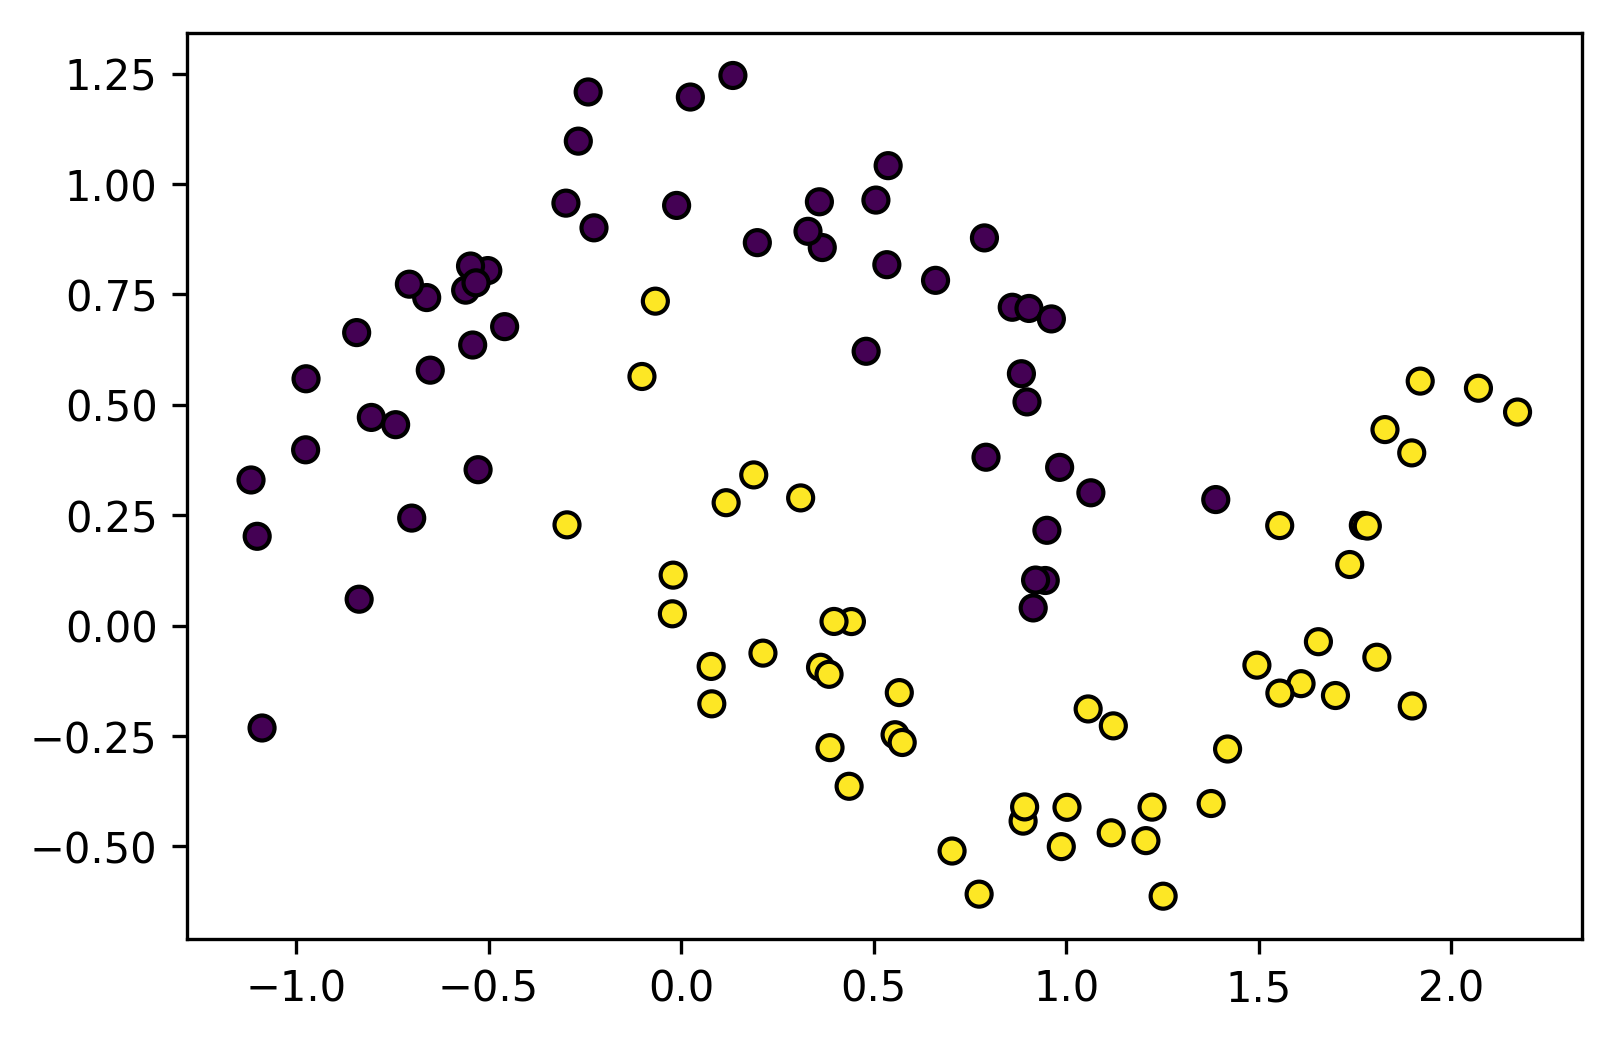

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=0)

In [4]:
# tree visualization

In [5]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
tree = DecisionTreeClassifier(max_depth=2)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [6]:
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)

In [7]:
print(tree_dot)

digraph Tree {
node [shape=box] ;
0 [label="worst perimeter <= 106.1\ngini = 0.4679\nsamples = 426\nvalue = [159, 267]"] ;
1 [label="worst concave points <= 0.1339\ngini = 0.0813\nsamples = 259\nvalue = [11, 248]"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0083\nsamples = 240\nvalue = [1, 239]"] ;
1 -> 2 ;
3 [label="gini = 0.4986\nsamples = 19\nvalue = [10, 9]"] ;
1 -> 3 ;
4 [label="worst concave points <= 0.1416\ngini = 0.2017\nsamples = 167\nvalue = [148, 19]"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="gini = 0.4967\nsamples = 37\nvalue = [20, 17]"] ;
4 -> 5 ;
6 [label="gini = 0.0303\nsamples = 130\nvalue = [128, 2]"] ;
4 -> 6 ;
}


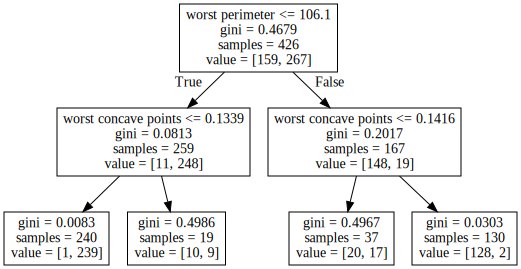

In [8]:
import graphviz
graphviz.Source(tree_dot)

# Parameter Tuning

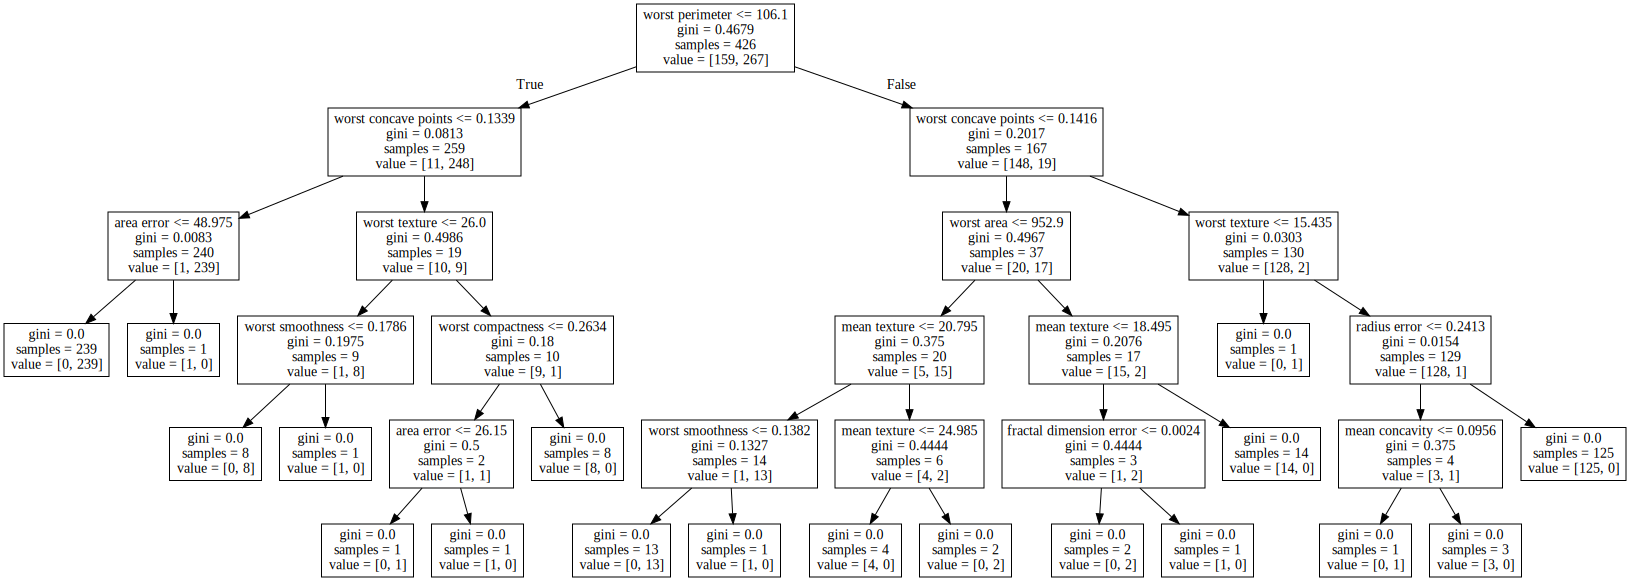

In [9]:
tree = DecisionTreeClassifier().fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="no_pruning")
graph

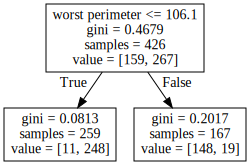

In [10]:
tree = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="max_depth_1")
graph

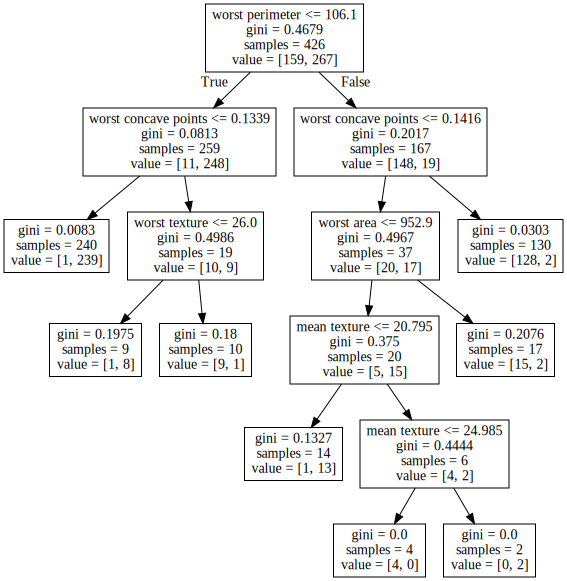

In [11]:
tree = DecisionTreeClassifier(max_leaf_nodes=8).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="max_leaf_nodes_8")
graph

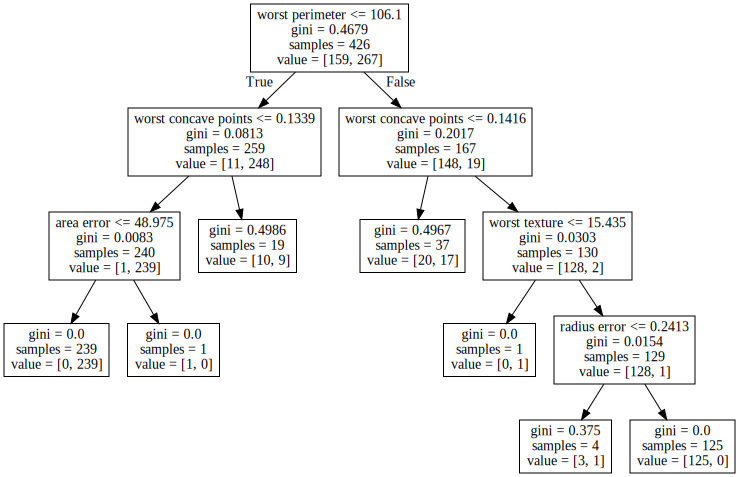

In [12]:
tree = DecisionTreeClassifier(min_samples_split=50).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph.render(filename="min_samples_split_50")
graph

In [13]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 7)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

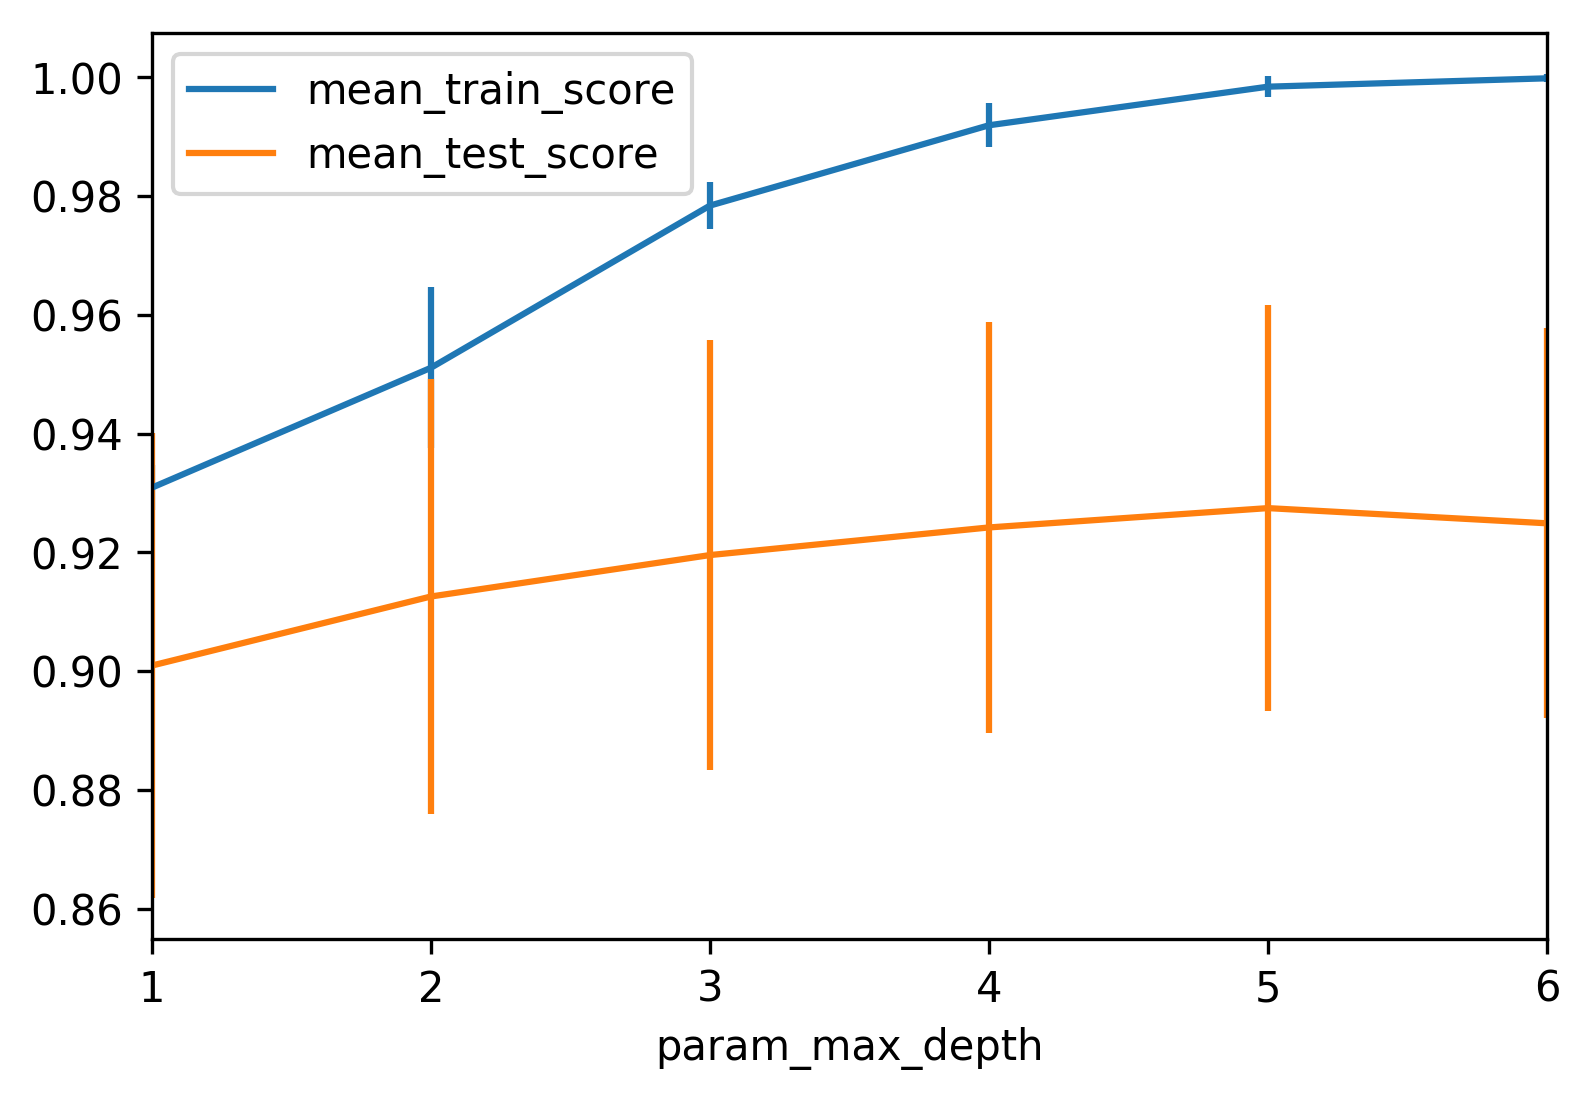

In [14]:
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
param_grid = {'max_depth':range(1, 7)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100))
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_depth', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

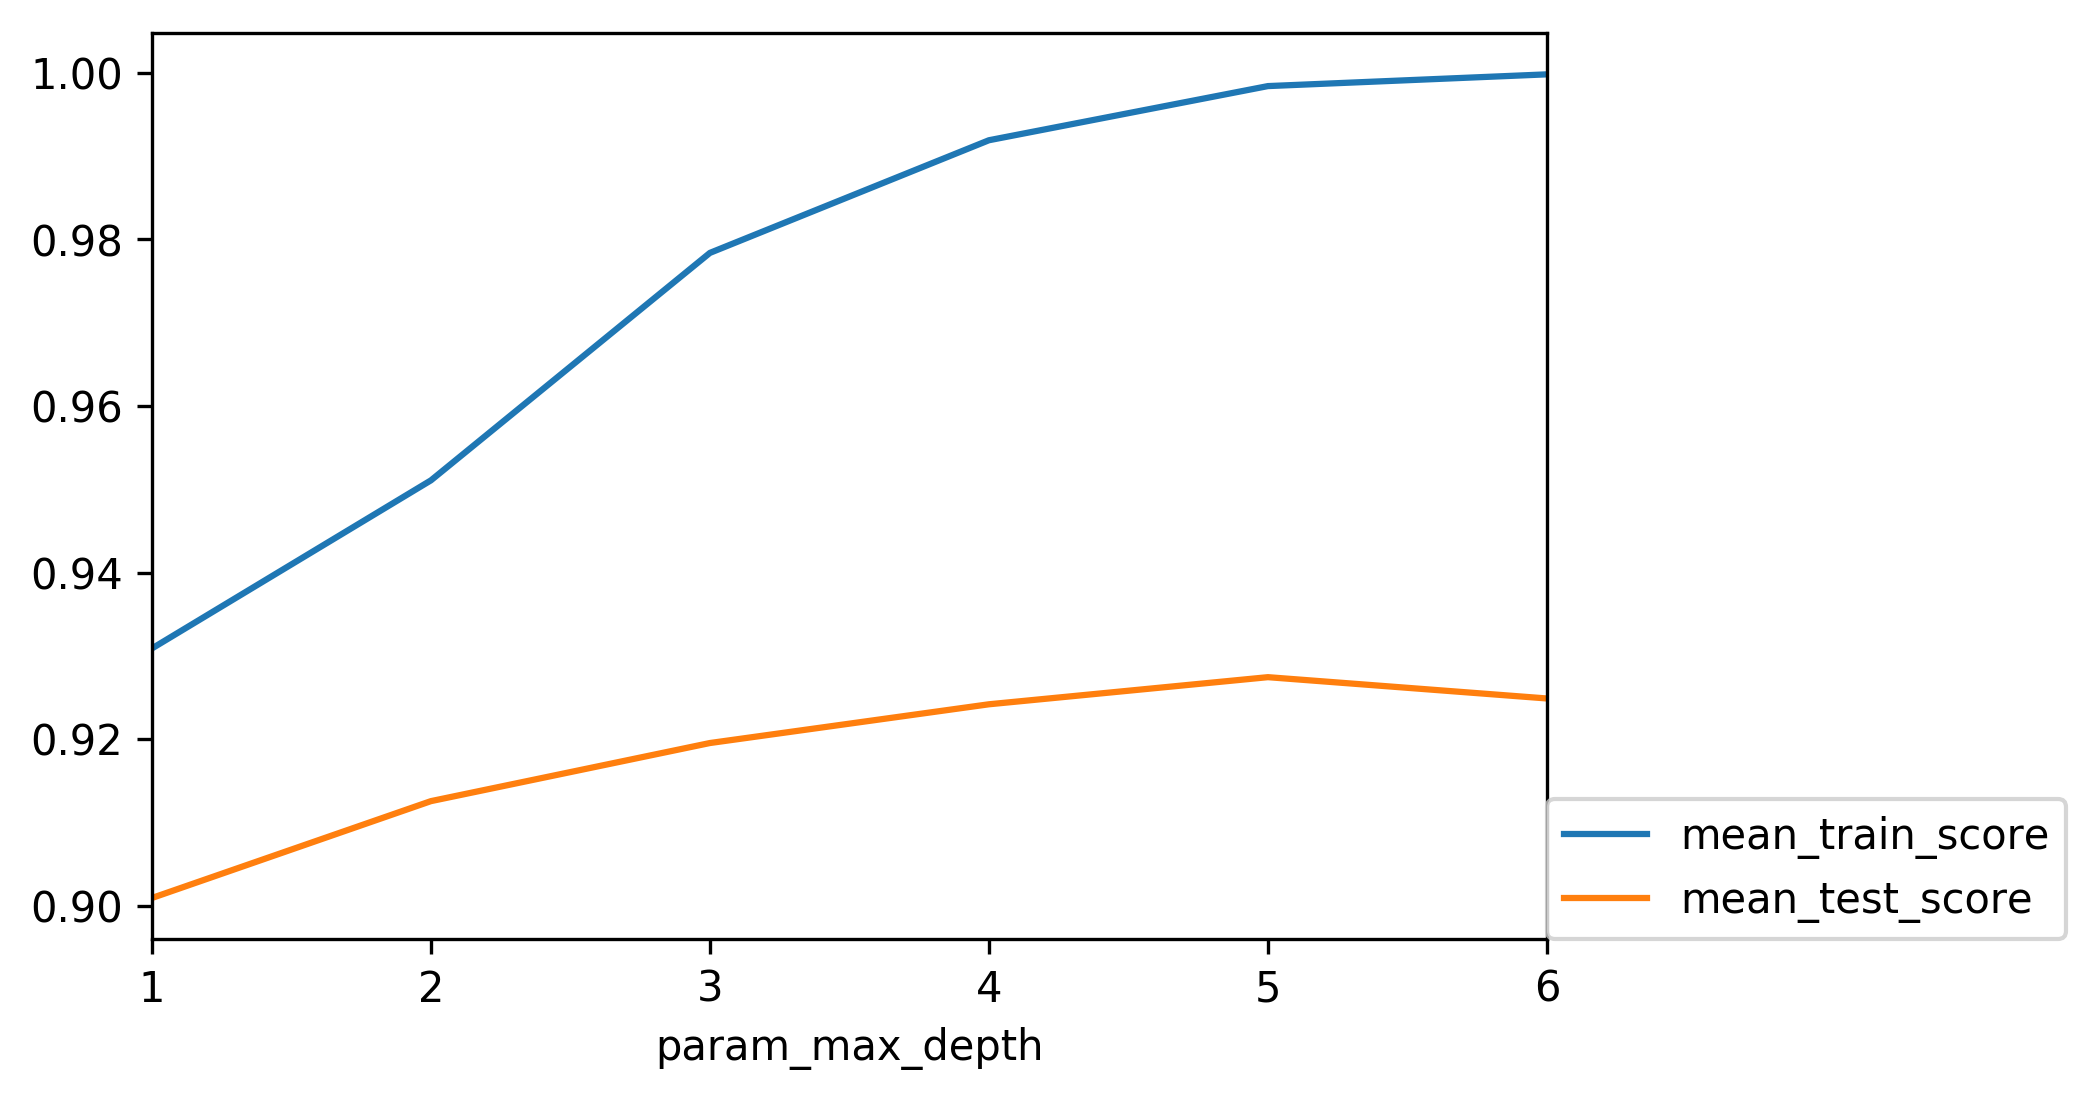

In [15]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_depth', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

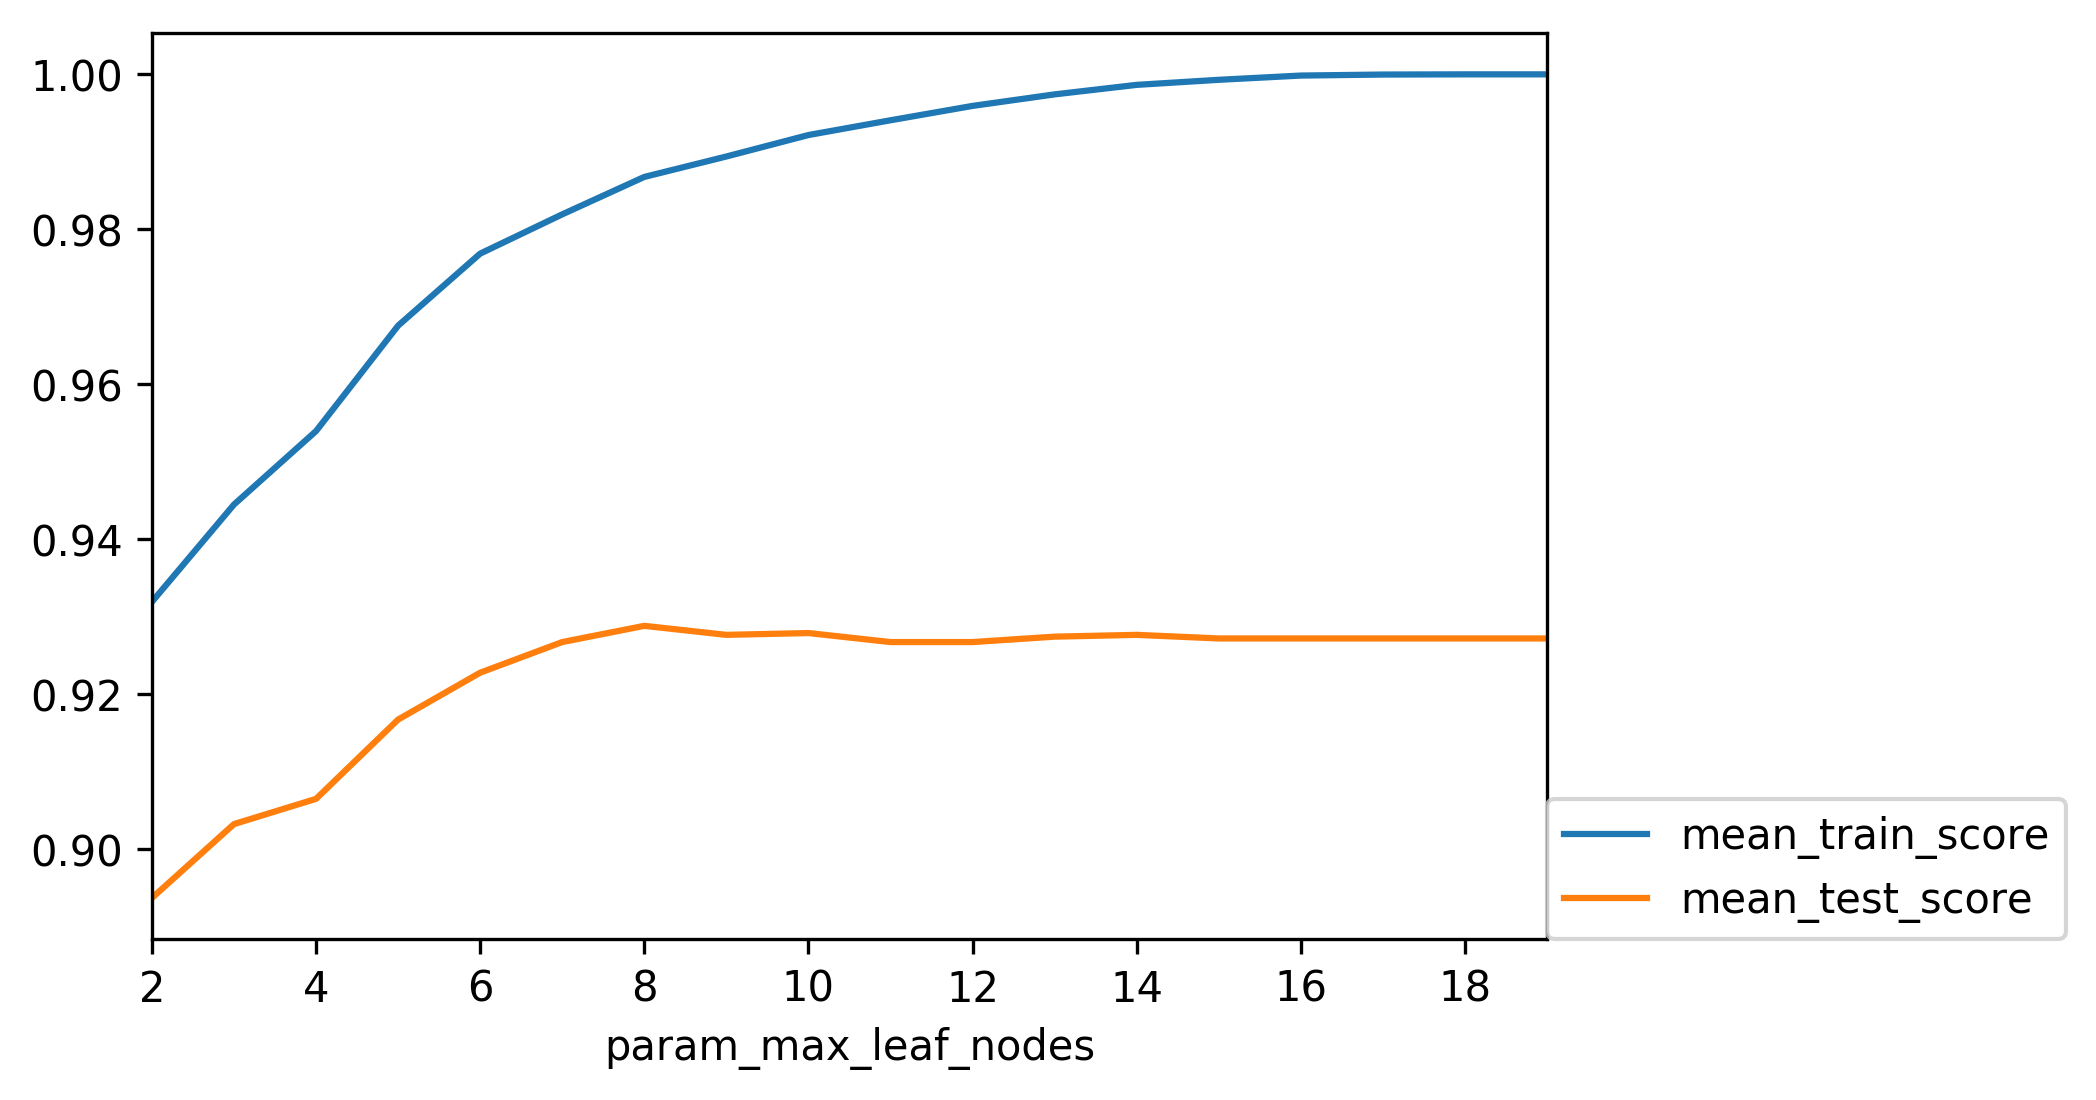

In [16]:
from sklearn.model_selection import GridSearchCV
param_grid = {'max_leaf_nodes':range(2, 20)}
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv=StratifiedShuffleSplit(100, random_state=1))
grid.fit(X_train, y_train)

scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y=['mean_train_score', 'mean_test_score'], ax=plt.gca())
plt.legend(loc=(1, 0))

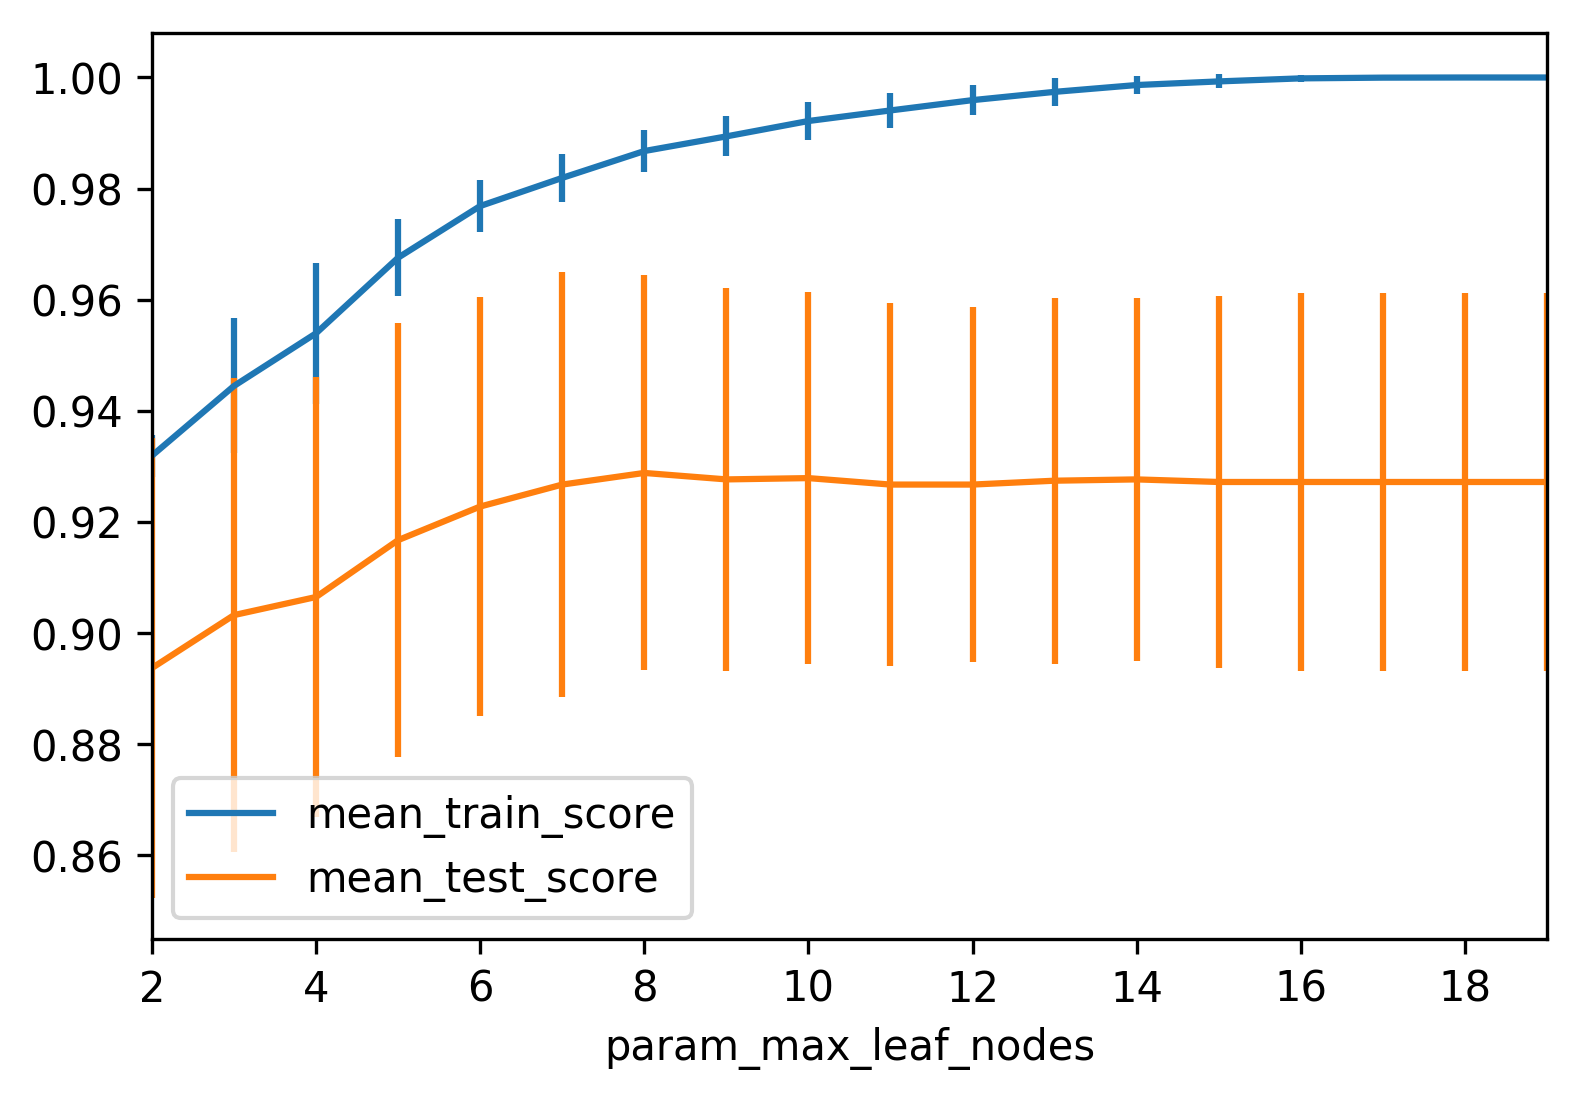

In [17]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_max_leaf_nodes', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_max_leaf_nodes', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

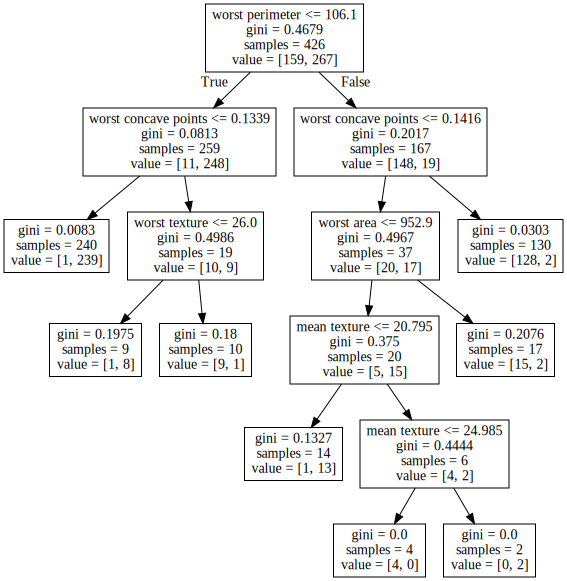

In [18]:
tree_dot = export_graphviz(grid.best_estimator_, out_file=None, feature_names=cancer.feature_names)
graph = graphviz.Source(tree_dot, format="png")
graph

# Extrapolation

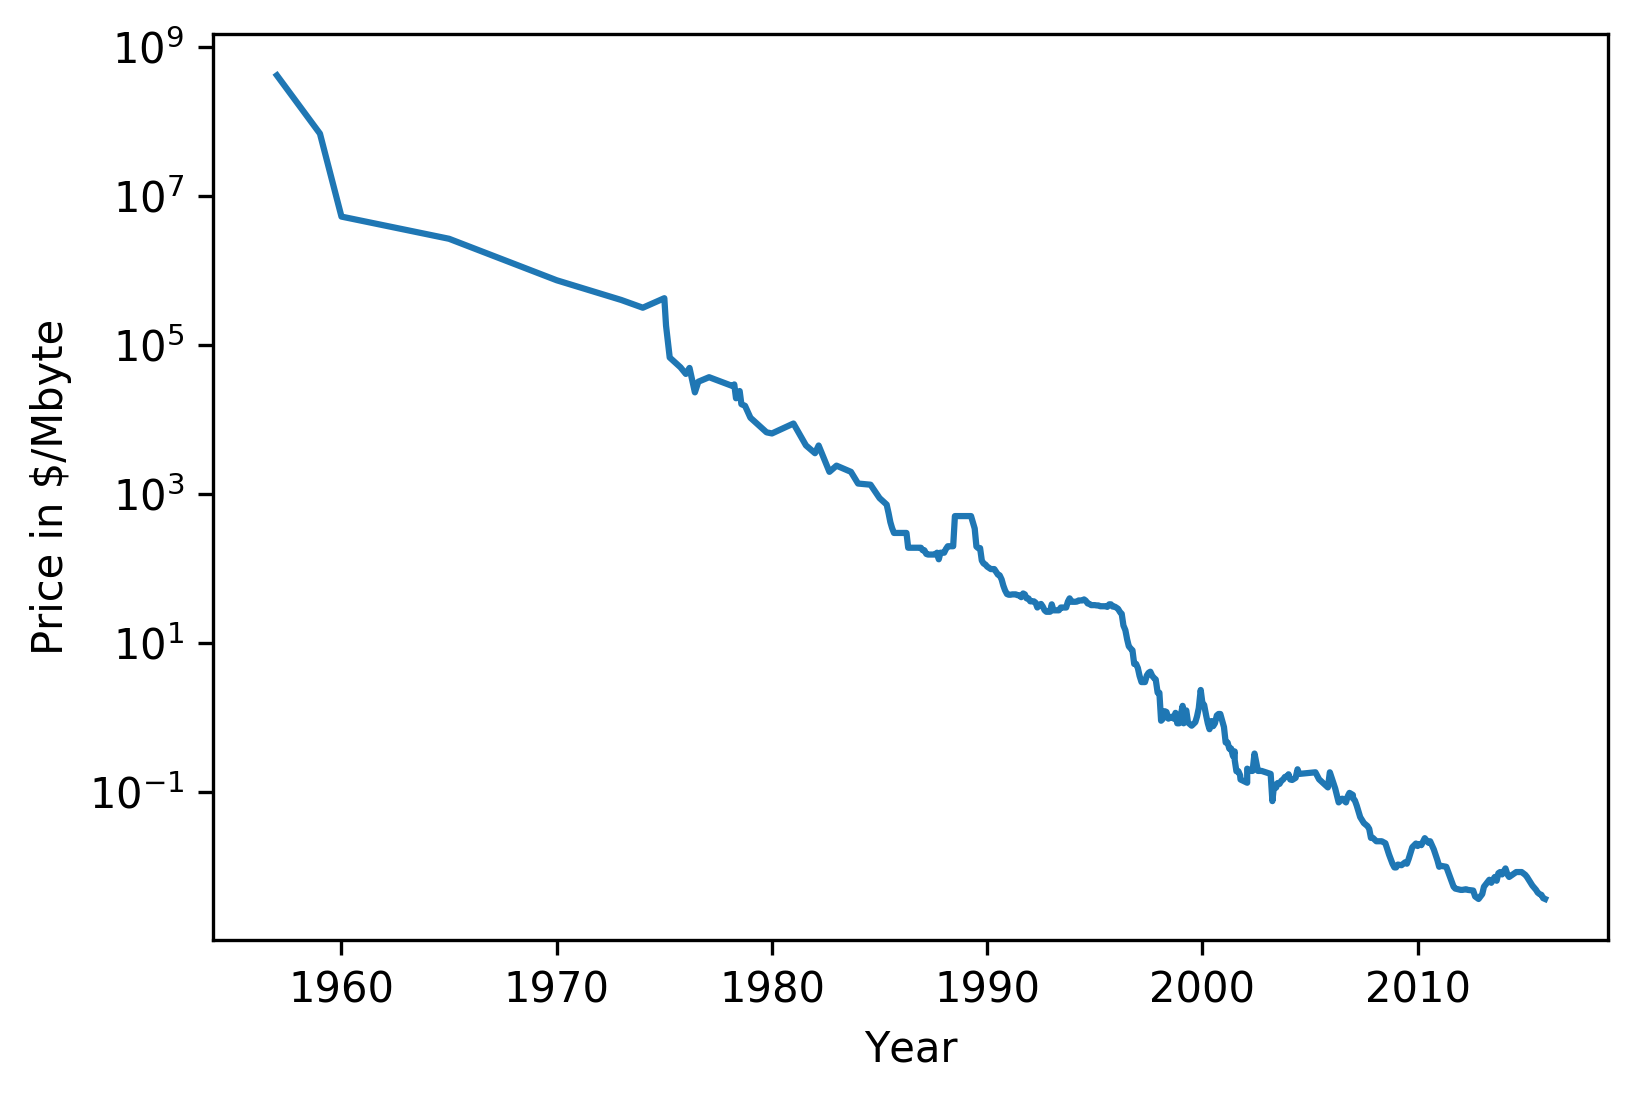

In [19]:
import os
ram_prices = pd.read_csv("ram_price.csv")

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# Use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# predict prices based on date:
X_train = data_train.date[:, np.newaxis]
# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

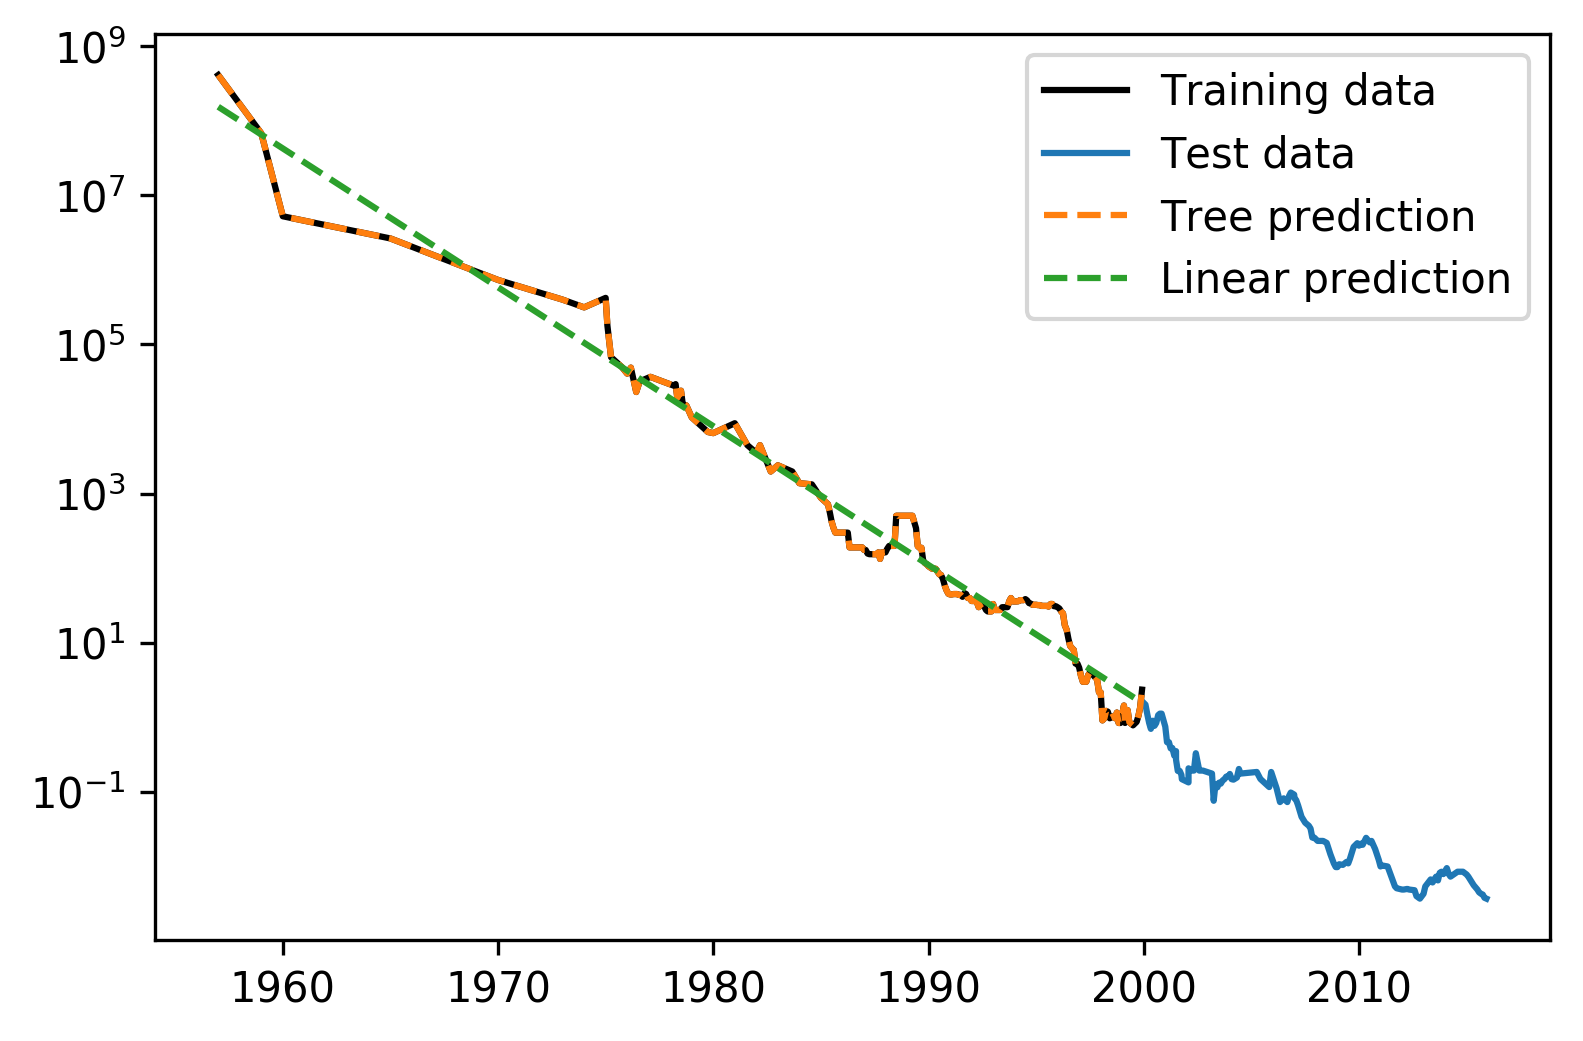

In [21]:
plt.semilogy(data_train.date, data_train.price, label="Training data", c='k')
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(data_train.date, np.exp(tree.predict(X_train)), '--', label="Tree prediction")
plt.semilogy(data_train.date, np.exp(linear_reg.predict(X_train)), '--', label="Linear prediction")
plt.legend()

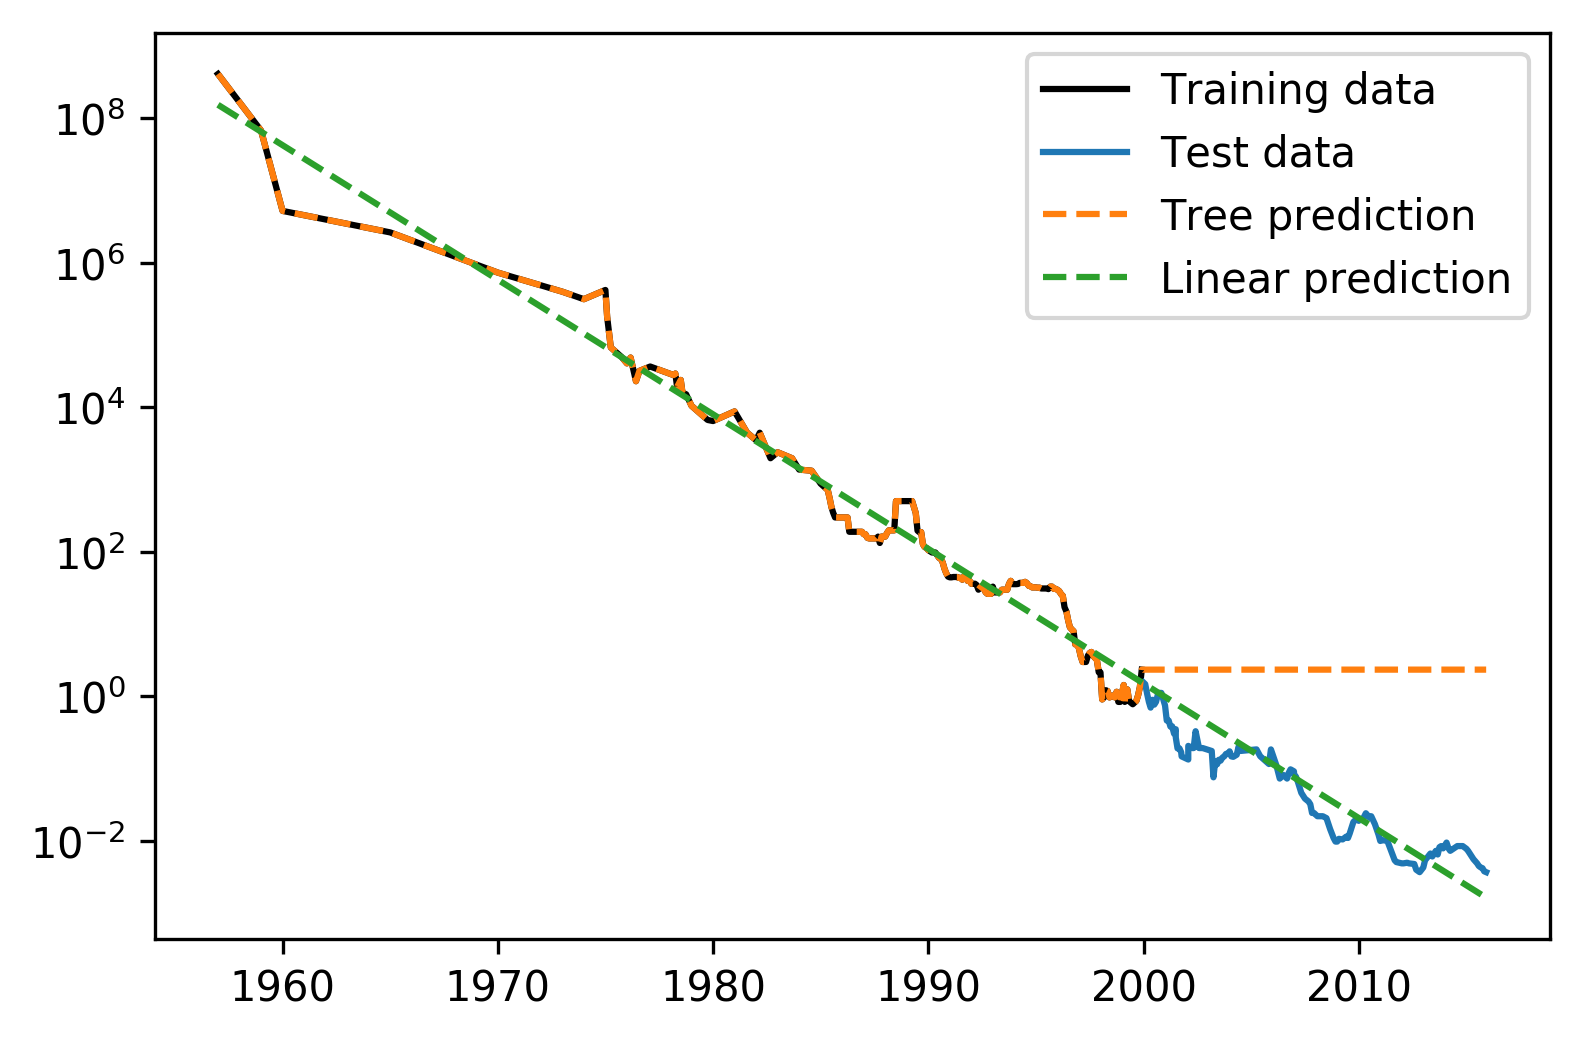

In [22]:
X_all = ram_prices.date[:, np.newaxis]
plt.semilogy(data_train.date, data_train.price, label="Training data", c='k')
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, np.exp(tree.predict(X_all)), '--', label="Tree prediction")
plt.semilogy(ram_prices.date, np.exp(linear_reg.predict(X_all)), '--', label="Linear prediction")
plt.legend()

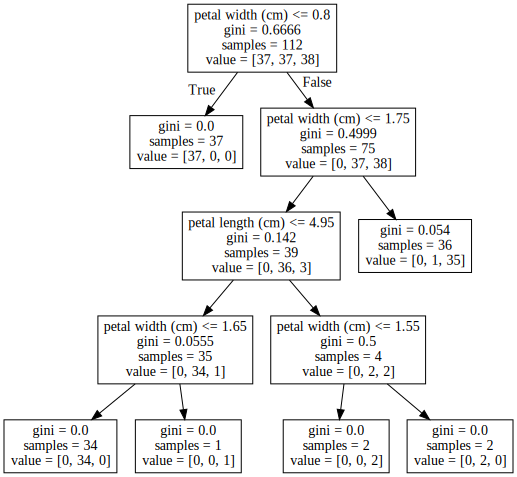

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
tree = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=iris.feature_names)
graphviz.Source(tree_dot)

In [24]:
tree.feature_importances_

array([ 0.   ,  0.   ,  0.022,  0.978])

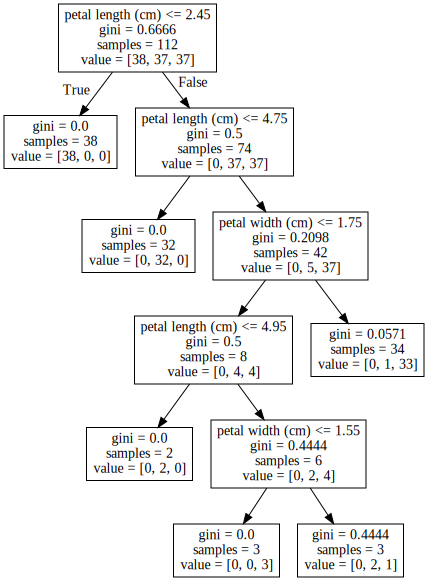

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=1)
tree = DecisionTreeClassifier(max_leaf_nodes=6).fit(X_train, y_train)
tree_dot = export_graphviz(tree, out_file=None, feature_names=iris.feature_names)
graphviz.Source(tree_dot)

In [26]:
tree.feature_importances_

array([ 0.   ,  0.   ,  0.941,  0.059])

([<matplotlib.axis.YTick at 0x7f7e9d17a978>,
 <a list of 4 Text yticklabel objects>)

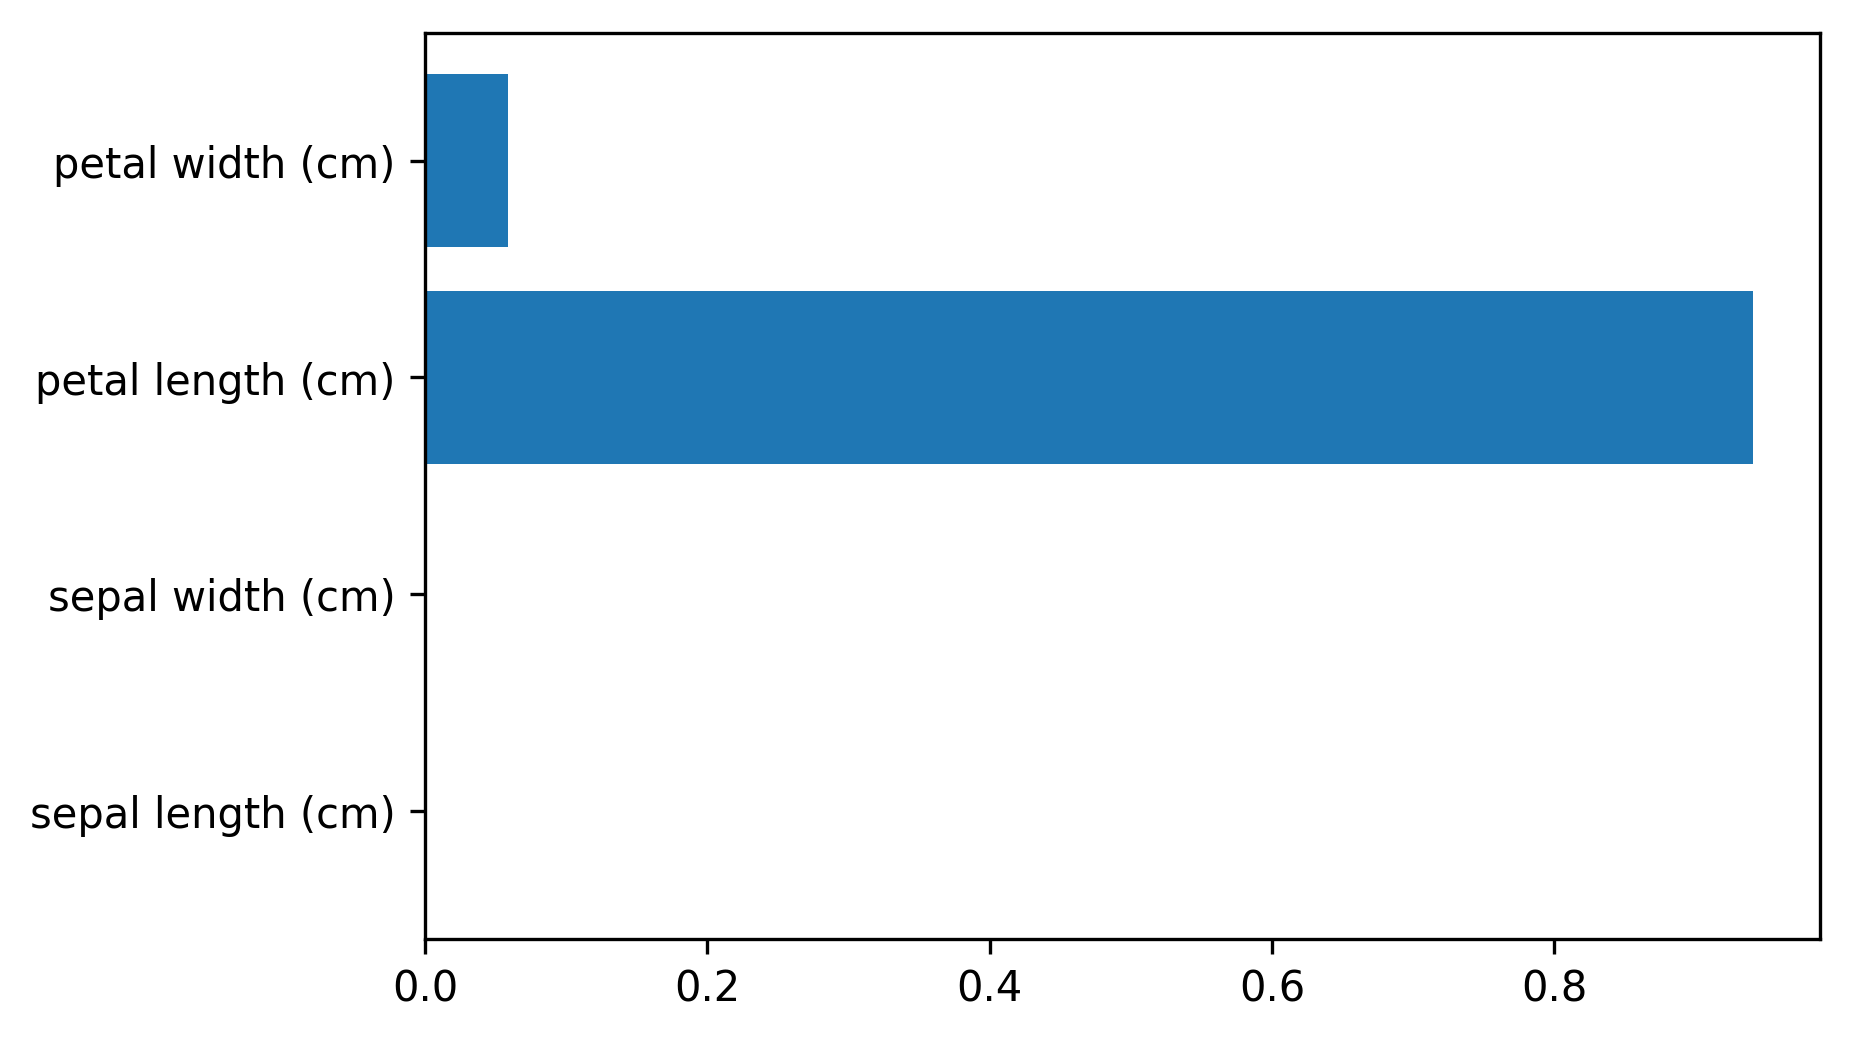

In [27]:
plt.barh(range(4), tree.feature_importances_)
plt.yticks(range(4), iris.feature_names)

# Voting Classifier

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.datasets import make_moons
X, y = make_moons(noise=.2, random_state=18) # carefully picked random state for illustration
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

voting = VotingClassifier([('logreg', LogisticRegression(C=100)),
                           ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))],
                         voting='soft')
voting.fit(X_train, y_train)
lr, tree = voting.estimators_
print(("{:.2f} " * 3).format(voting.score(X_test, y_test),
                             lr.score(X_test, y_test), tree.score(X_test, y_test)))


0.88 0.84 0.80 


In [29]:
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
# transform produces individual probabilities
lr_probs, tree_probs =  voting.transform(X_grid)

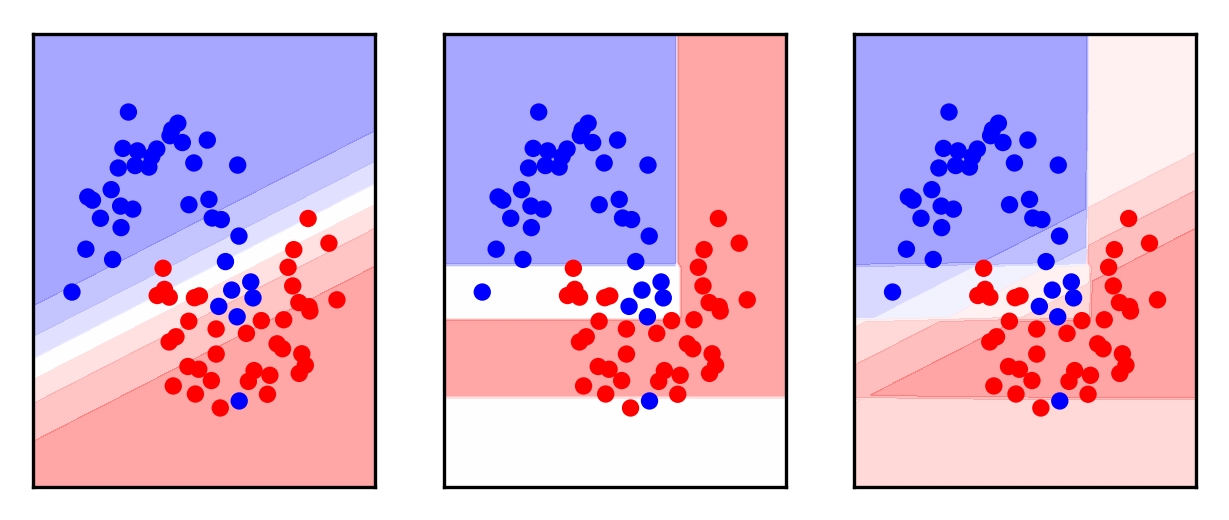

In [30]:
fig, axes = plt.subplots(1, 3, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(5, 2))
for prob, ax in zip([lr_probs, tree_probs, lr_probs + tree_probs], axes.ravel()):
    ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)

In [31]:
voting.estimators_[0].score(X_test, y_test)

0.83999999999999997

In [32]:
voting.estimators_[1].score(X_test, y_test)

0.80000000000000004

In [33]:
voting.score(X_test, y_test)

0.88

# Random Forests

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, stratify=digits.target, random_state=0)

In [35]:
train_scores = []
test_scores = []

rf = RandomForestClassifier(warm_start=True)
estimator_range = range(1, 100, 5)
for n_estimators in estimator_range:
    rf.n_estimators = n_estimators
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))

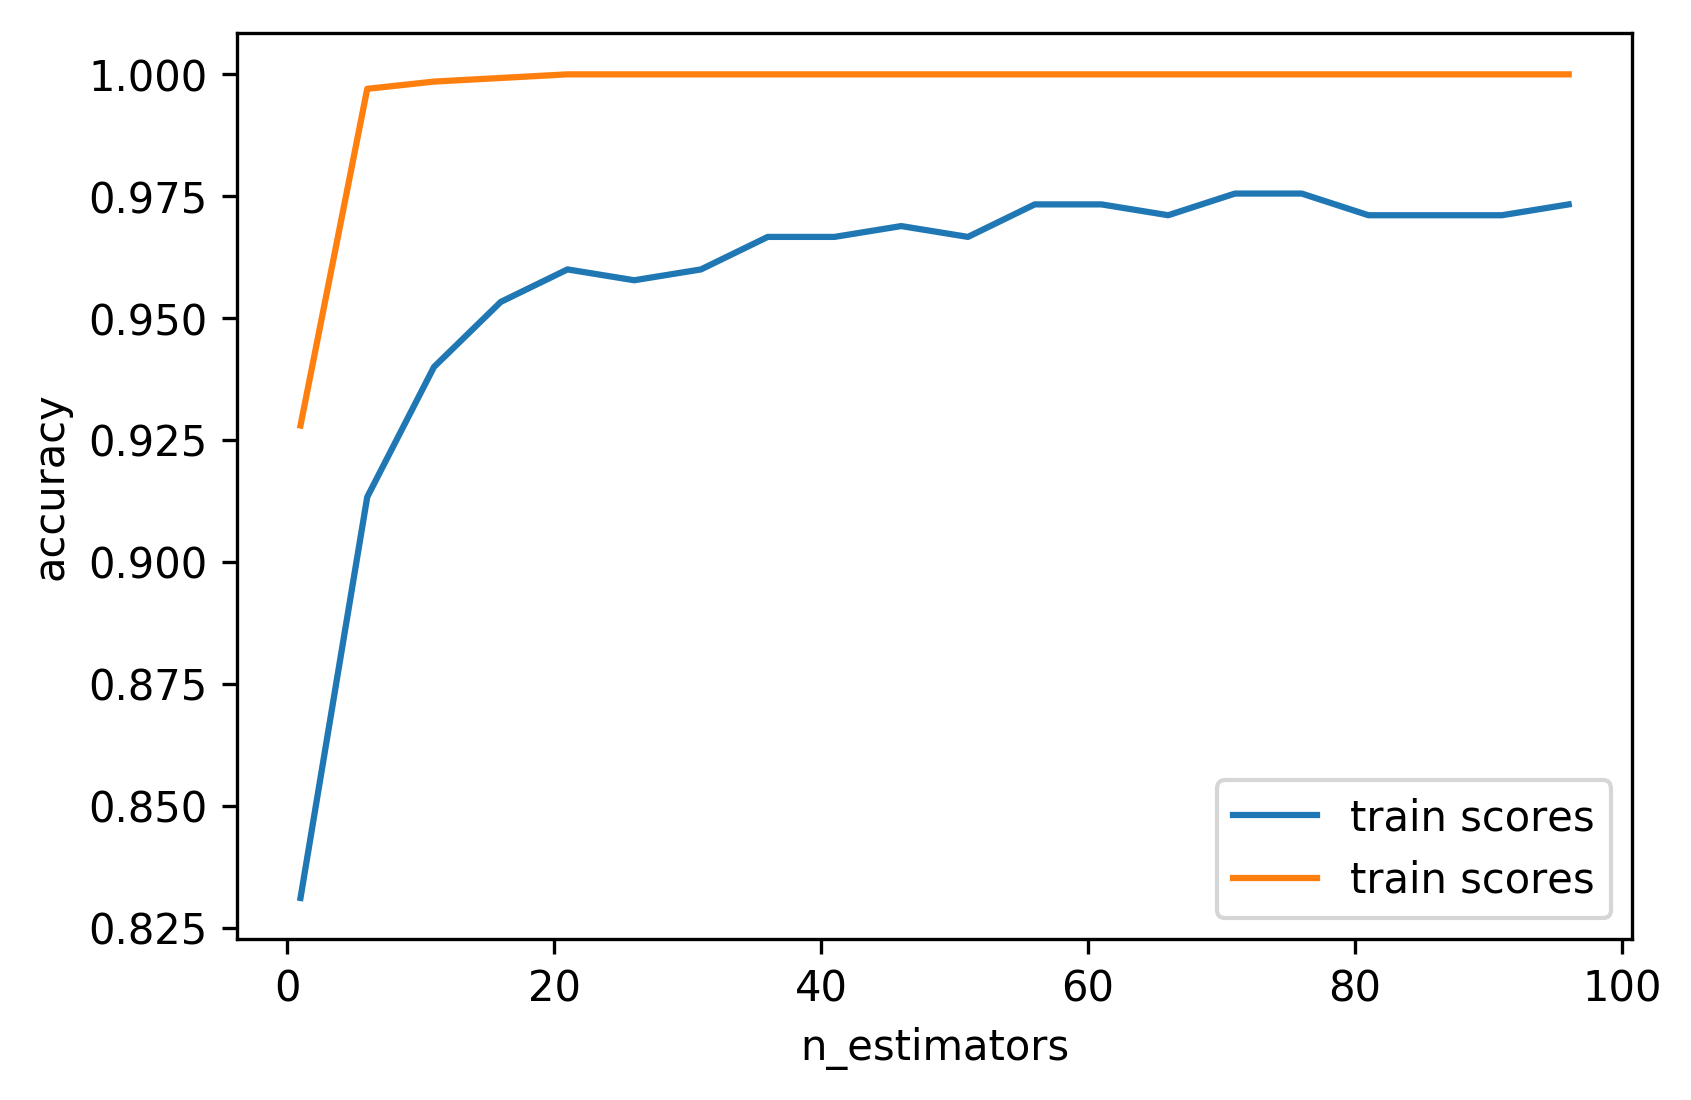

In [36]:
plt.plot(estimator_range, test_scores, label="train scores")
plt.plot(estimator_range, train_scores, label="train scores")
plt.ylabel("accuracy")
plt.xlabel("n_estimators")
plt.legend()

In [37]:
train_scores = []
test_scores = []
oob_scores = []

feature_range = range(1, 64, 5)
for max_features in feature_range:
    rf = RandomForestClassifier(max_features=max_features, oob_score=True, n_estimators=200, random_state=0)
    rf.fit(X_train, y_train)
    train_scores.append(rf.score(X_train, y_train))
    test_scores.append(rf.score(X_test, y_test))
    oob_scores.append(rf.oob_score_)

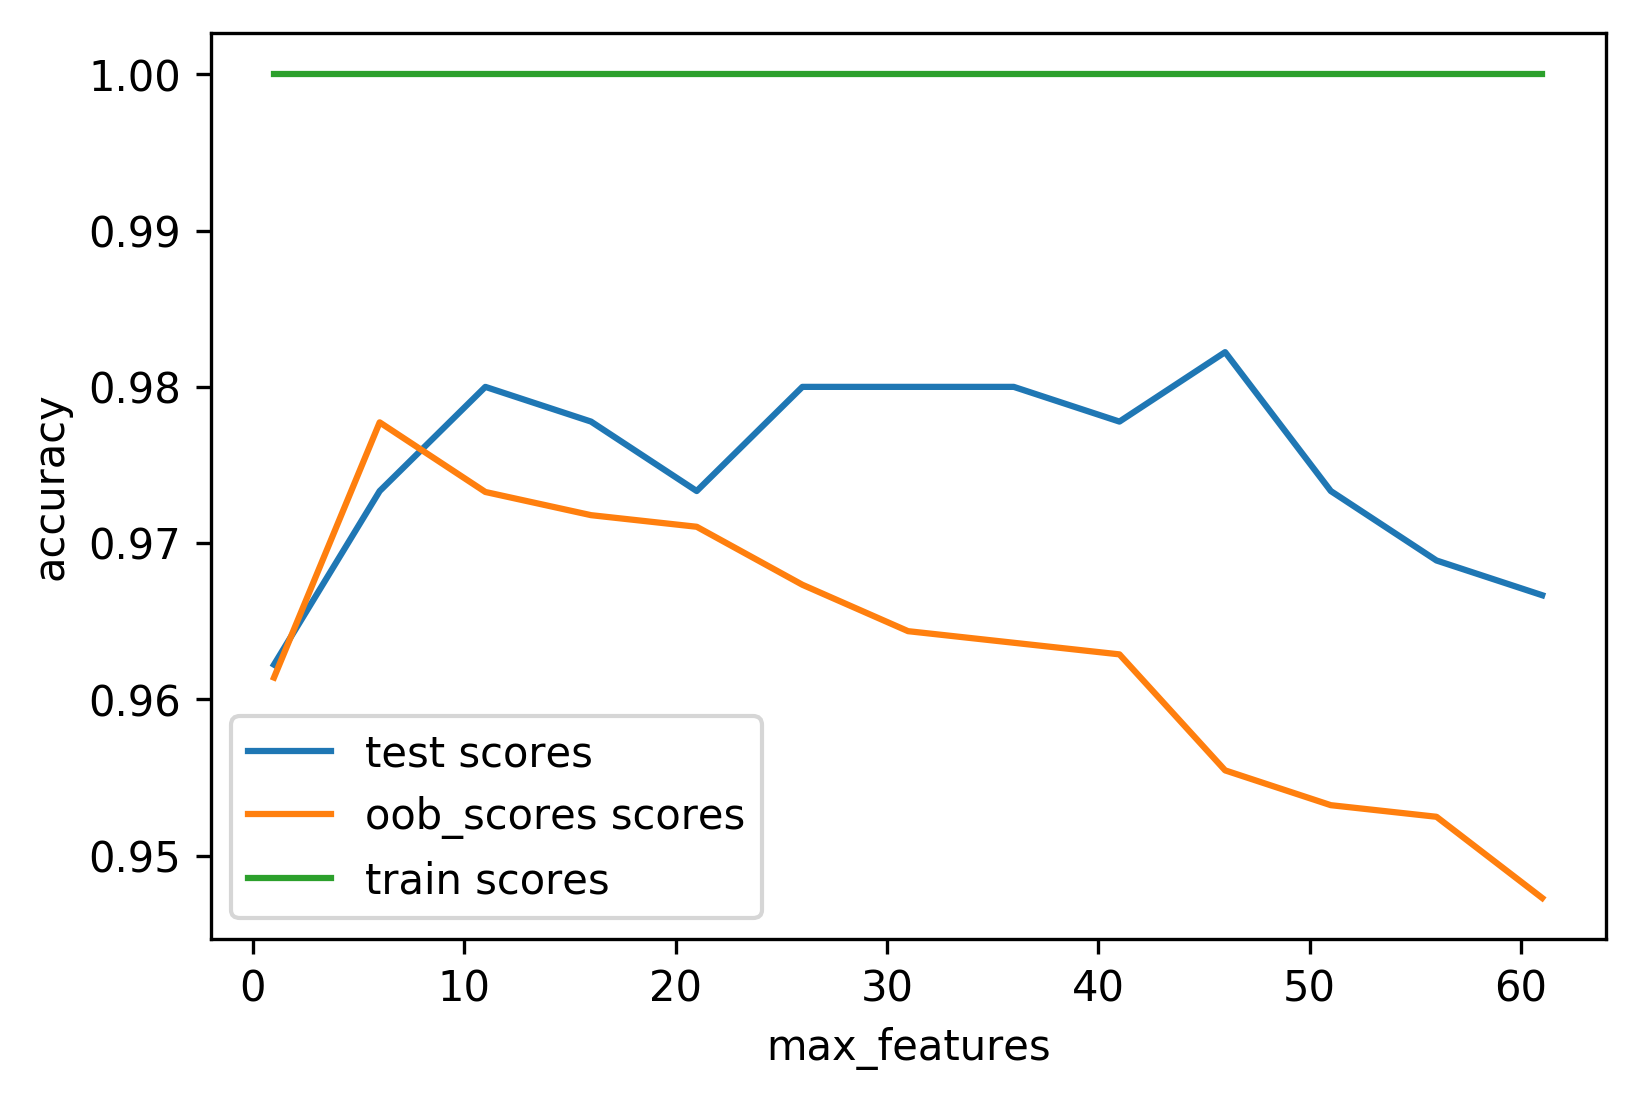

In [38]:
plt.plot(feature_range, test_scores, label="test scores")
plt.plot(feature_range, oob_scores, label="oob_scores scores")
plt.plot(feature_range, train_scores, label="train scores")
plt.legend()
plt.ylabel("accuracy")
plt.xlabel("max_features")

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=1)
rf = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

In [40]:
rf.feature_importances_

array([ 0.126,  0.033,  0.445,  0.396])

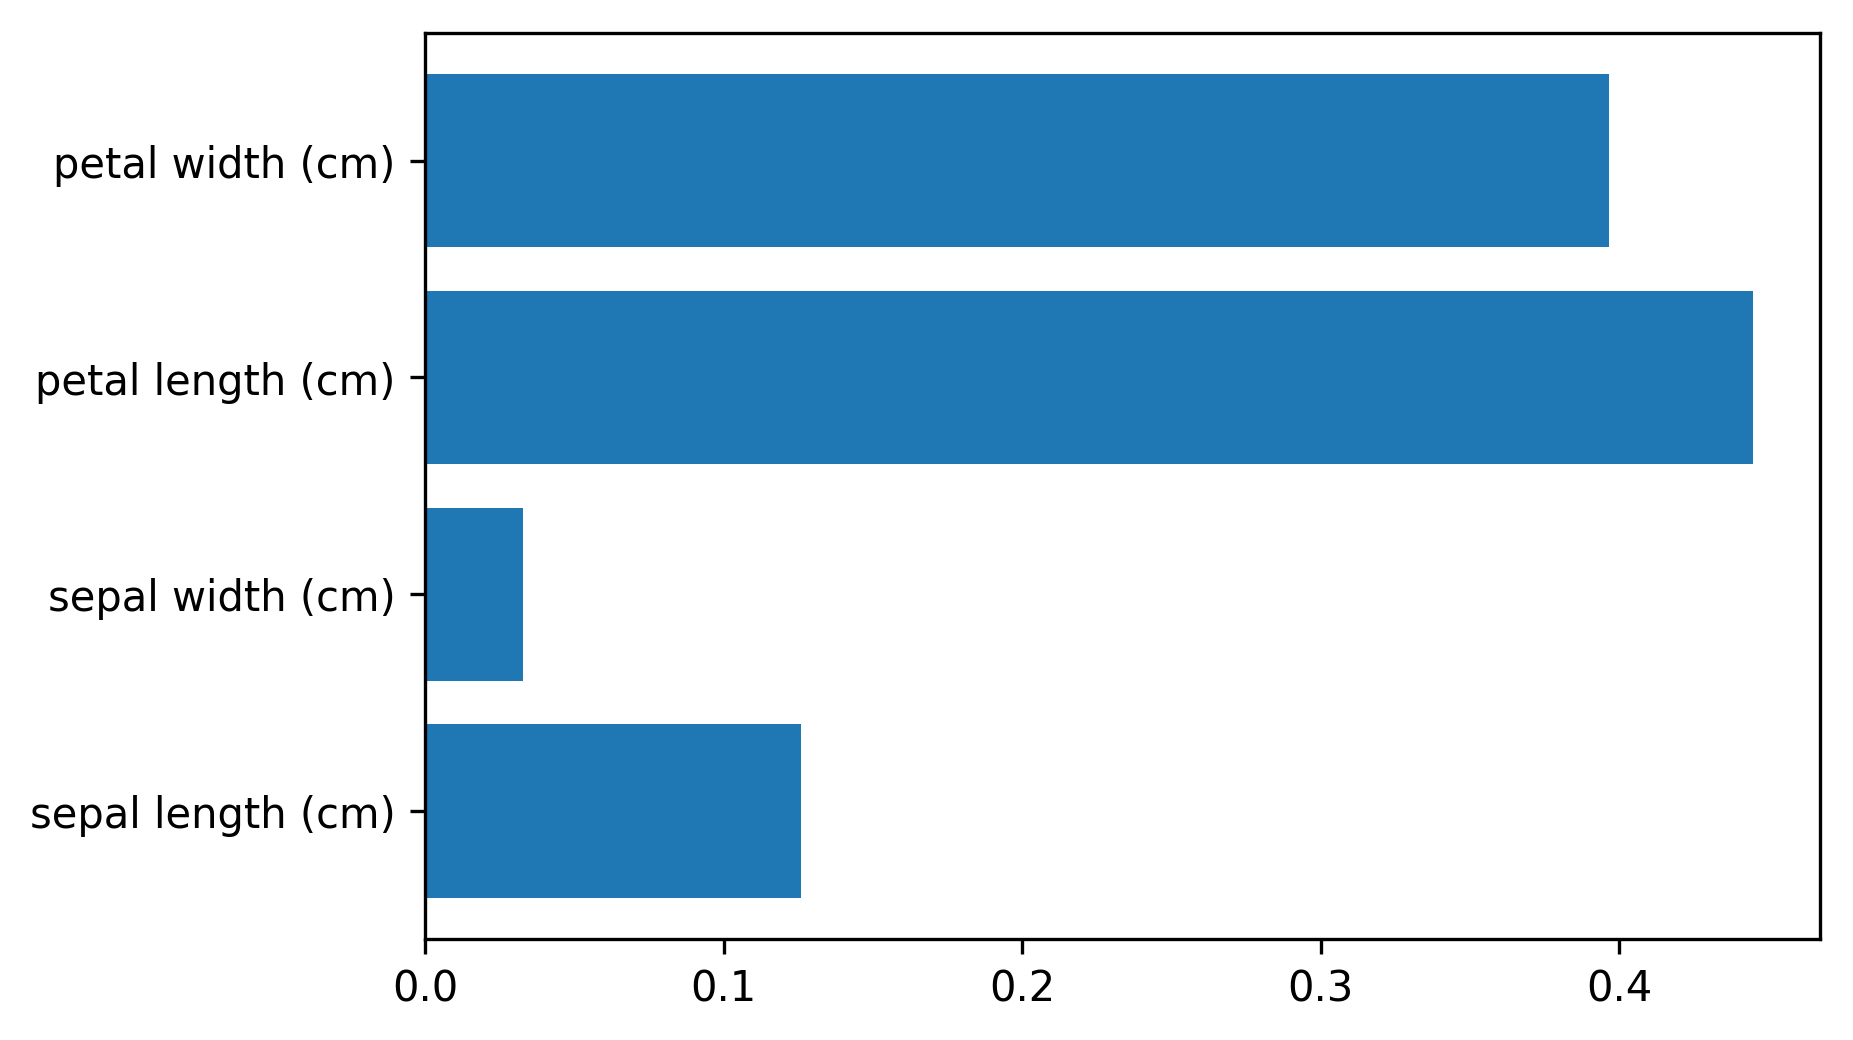

In [41]:
plt.barh(range(4), rf.feature_importances_)
plt.yticks(range(4), iris.feature_names);

# Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
gbrt = GradientBoostingClassifier().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.97368421052631582

In [43]:
# illustration on synthetic moon data
from sklearn.datasets import make_moons
X, y = make_moons(noise=.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)
gbrt = GradientBoostingClassifier(max_depth=2, n_estimators=10, learning_rate=.2, random_state=0).fit(X_train, y_train)
gbrt.score(X_test, y_test)

1.0

In [44]:
# create a grid for plotting decision functions...
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]

probs = [x for x in gbrt.staged_predict_proba(X_grid)]


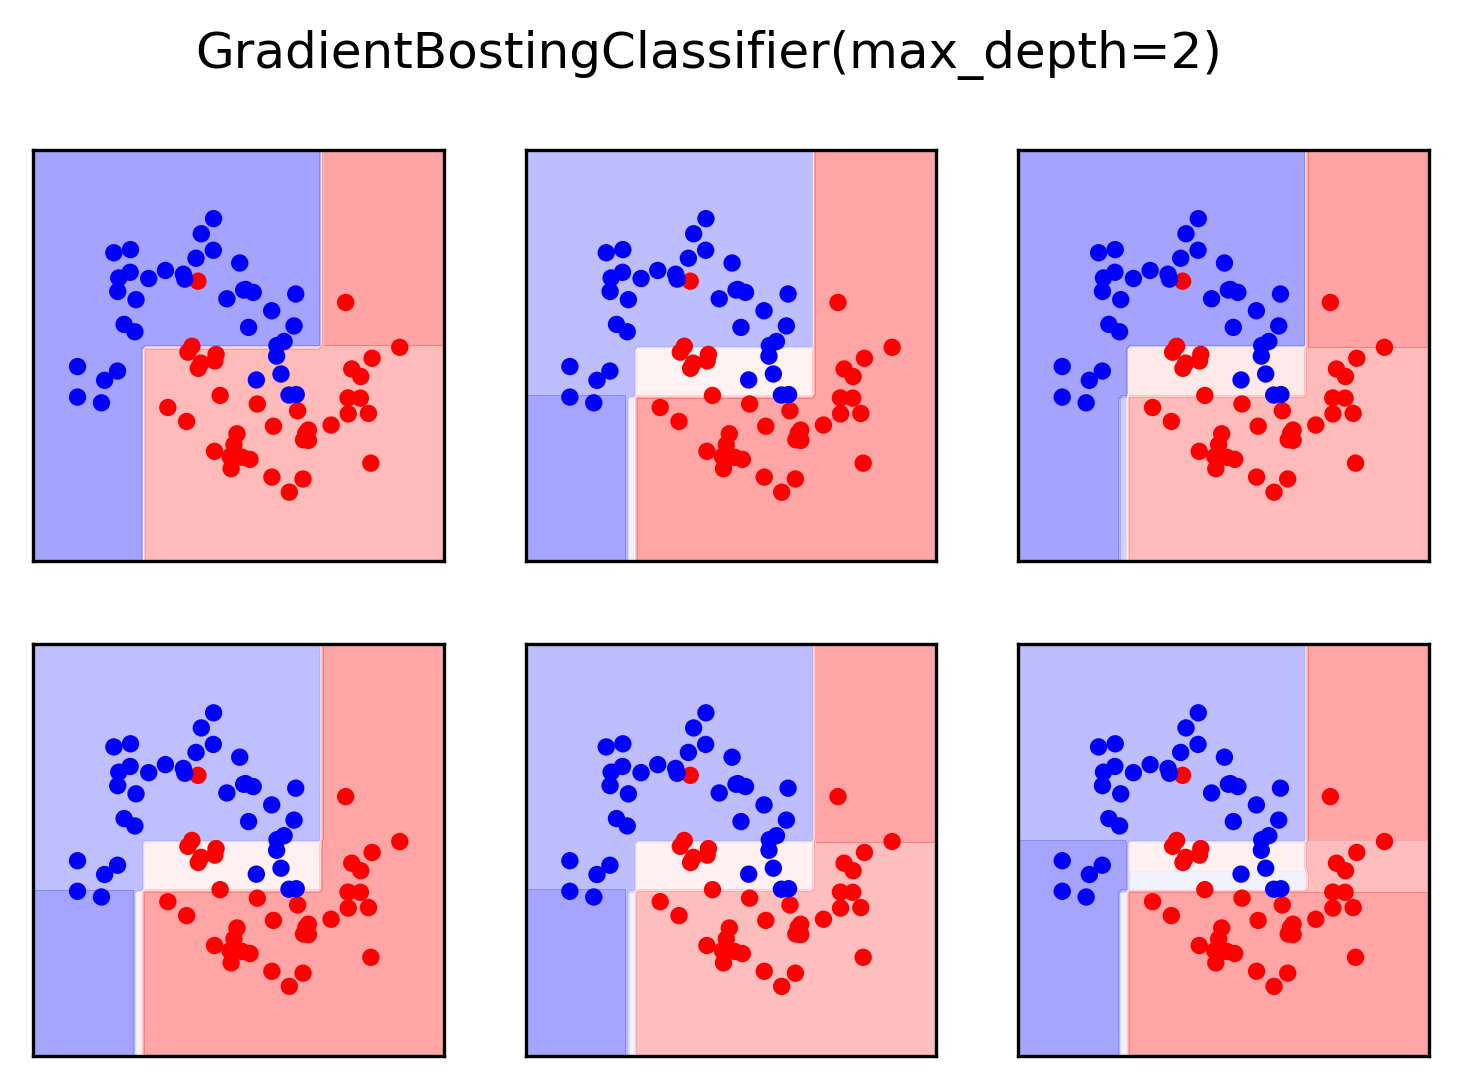

In [45]:
fig, axes = plt.subplots(2, 3, subplot_kw={'xticks': (()), 'yticks': (())})
for prob, ax in zip(probs, axes.ravel()):
    ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)
fig.suptitle("GradientBostingClassifier(max_depth=2)")

In [46]:
param_grid = {'learning_rate': [.2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.2, 0.1, 0.05, 0.02, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

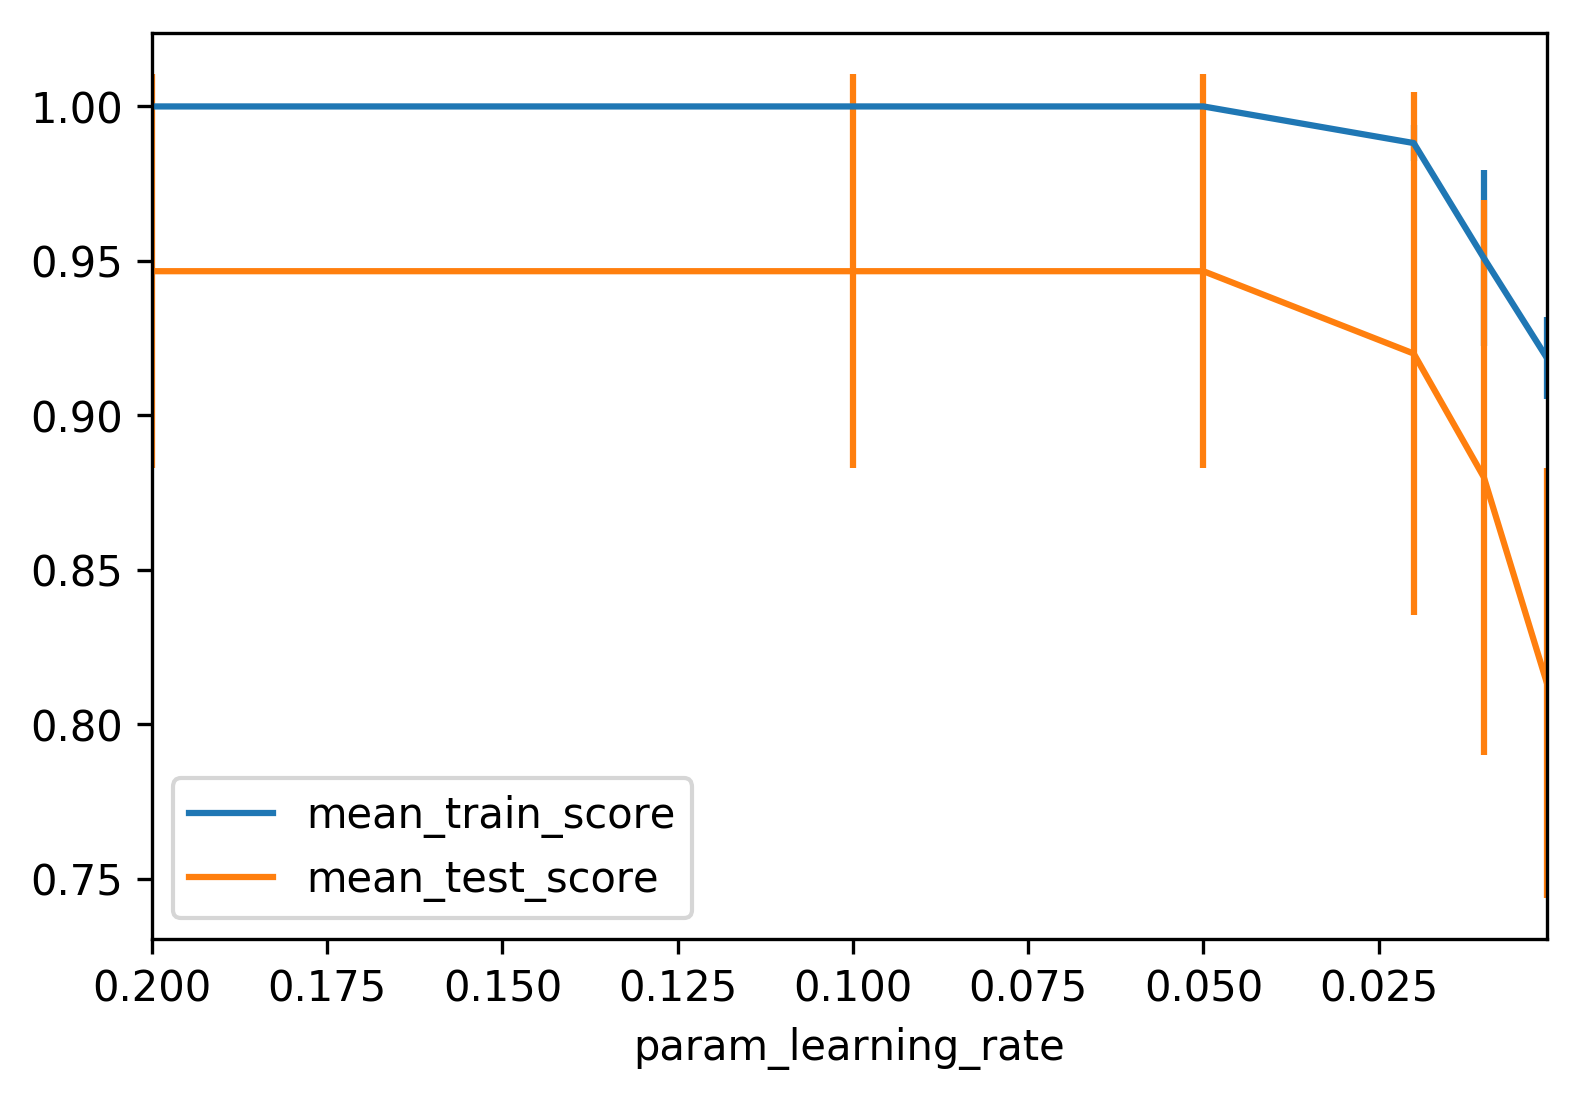

In [47]:
scores = pd.DataFrame(grid.cv_results_)
scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [48]:
from sklearn.datasets import load_boston
from sklearn.ensemble import GradientBoostingRegressor
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

gbrt = GradientBoostingRegressor().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.81852677031424126

In [49]:
param_grid = {'learning_rate': [.5, .2, .1, .05, .02, .01, .001]}
grid = GridSearchCV(GradientBoostingRegressor(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train);

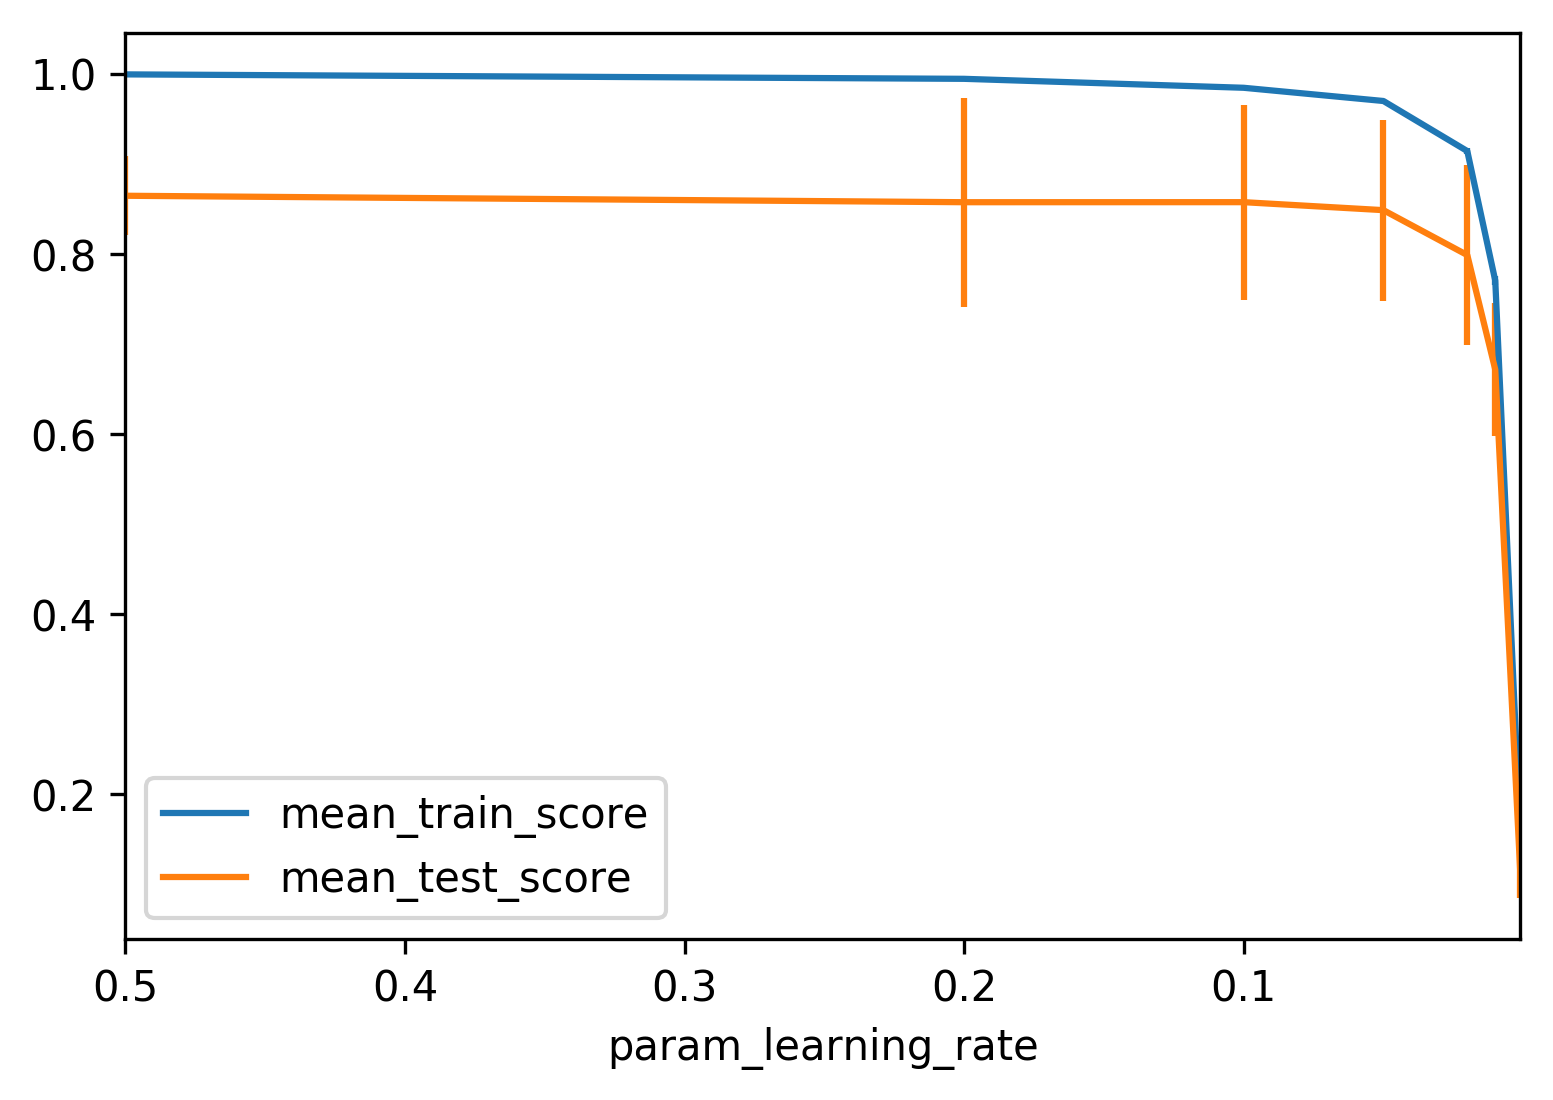

In [50]:
scores = pd.DataFrame(grid.cv_results_)

scores.plot(x='param_learning_rate', y='mean_train_score', yerr='std_train_score', ax=plt.gca())
scores.plot(x='param_learning_rate', y='mean_test_score', yerr='std_test_score', ax=plt.gca())

In [51]:
grid.best_params_, grid.best_score_

({'learning_rate': 0.5}, 0.8648986681678702)

In [52]:
gbrt.feature_importances_

array([ 0.077,  0.001,  0.028,  0.012,  0.088,  0.191,  0.114,  0.11 ,
        0.024,  0.059,  0.049,  0.066,  0.181])

In [53]:
np.argsort(gbrt.feature_importances_)[-5:]

array([ 4,  7,  6, 12,  5])

In [54]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(
    boston.data, boston.target, random_state=0)

gbrt = GradientBoostingRegressor().fit(X_train, y_train)
gbrt.score(X_test, y_test)

0.81833662390886375

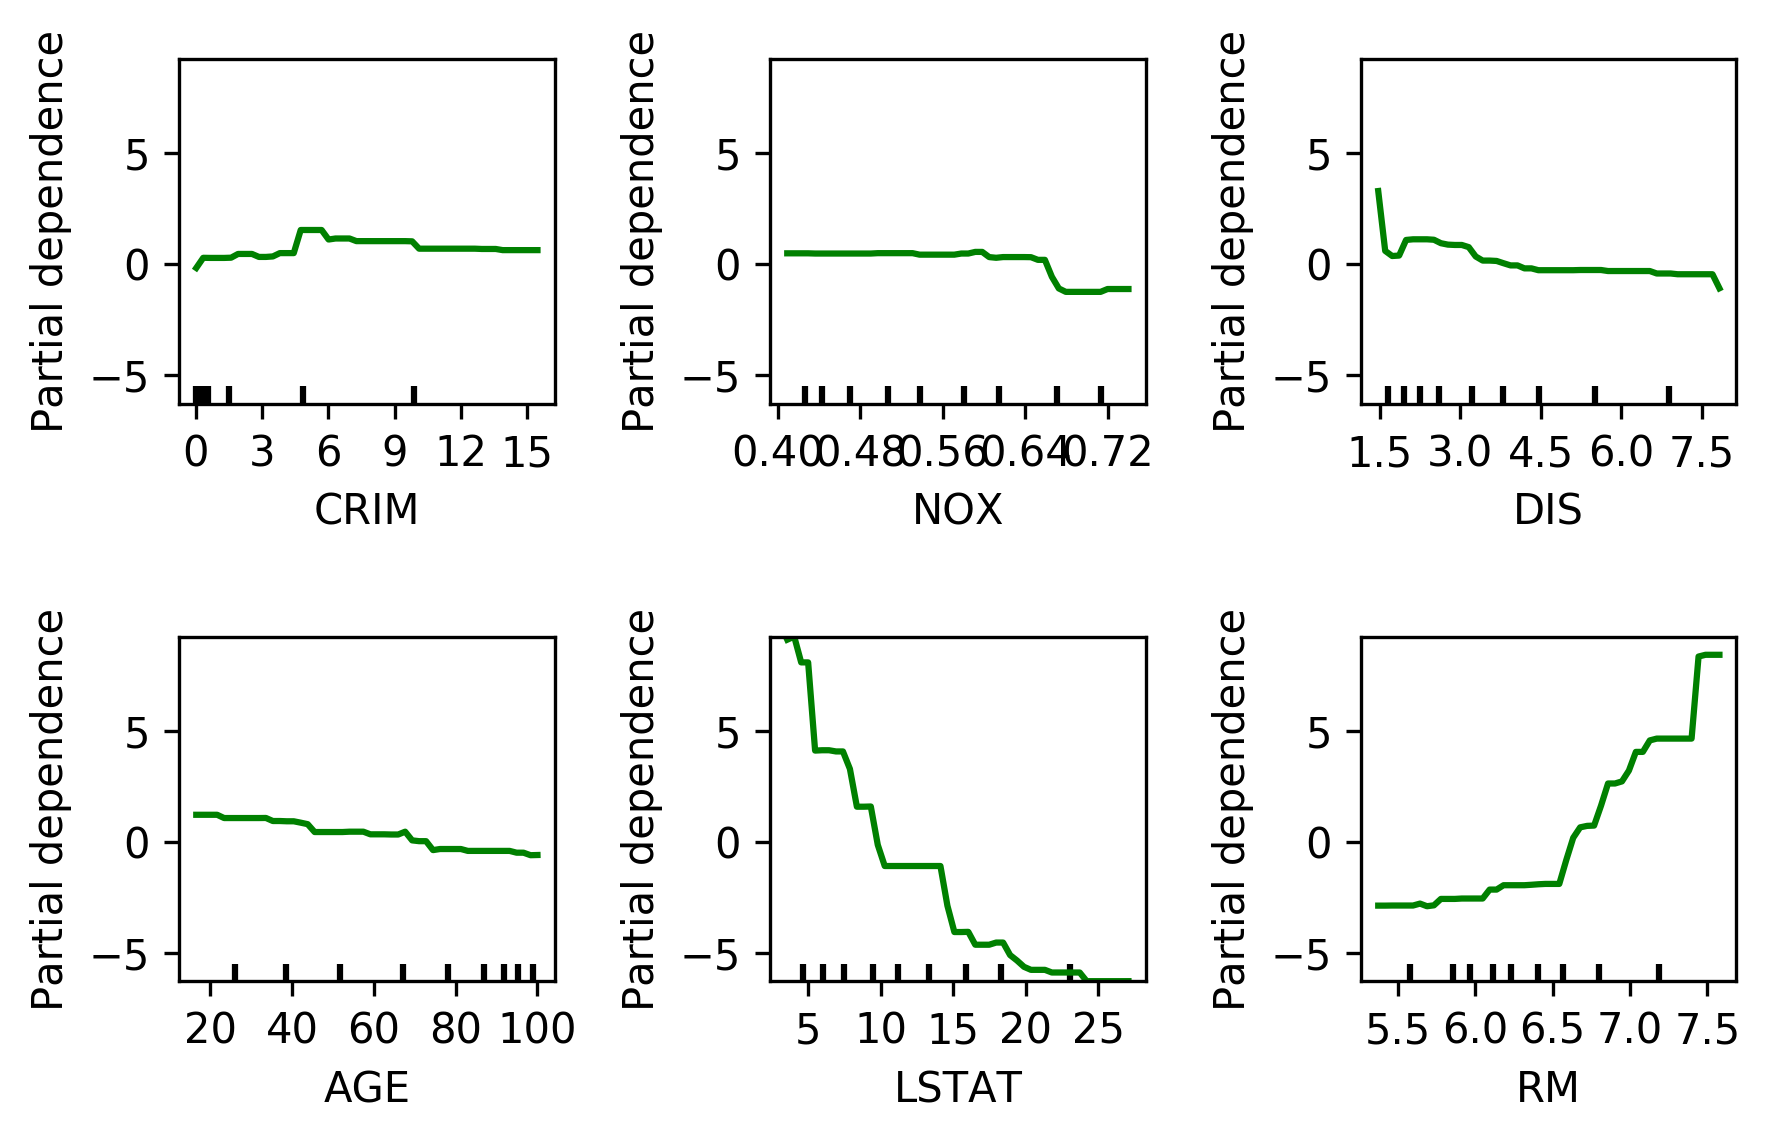

In [55]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
fig, axs = plot_partial_dependence(gbrt, X_train, np.argsort(gbrt.feature_importances_)[-6:],
                                       feature_names=boston.feature_names,
                                       n_jobs=3, grid_resolution=50)
plt.tight_layout()

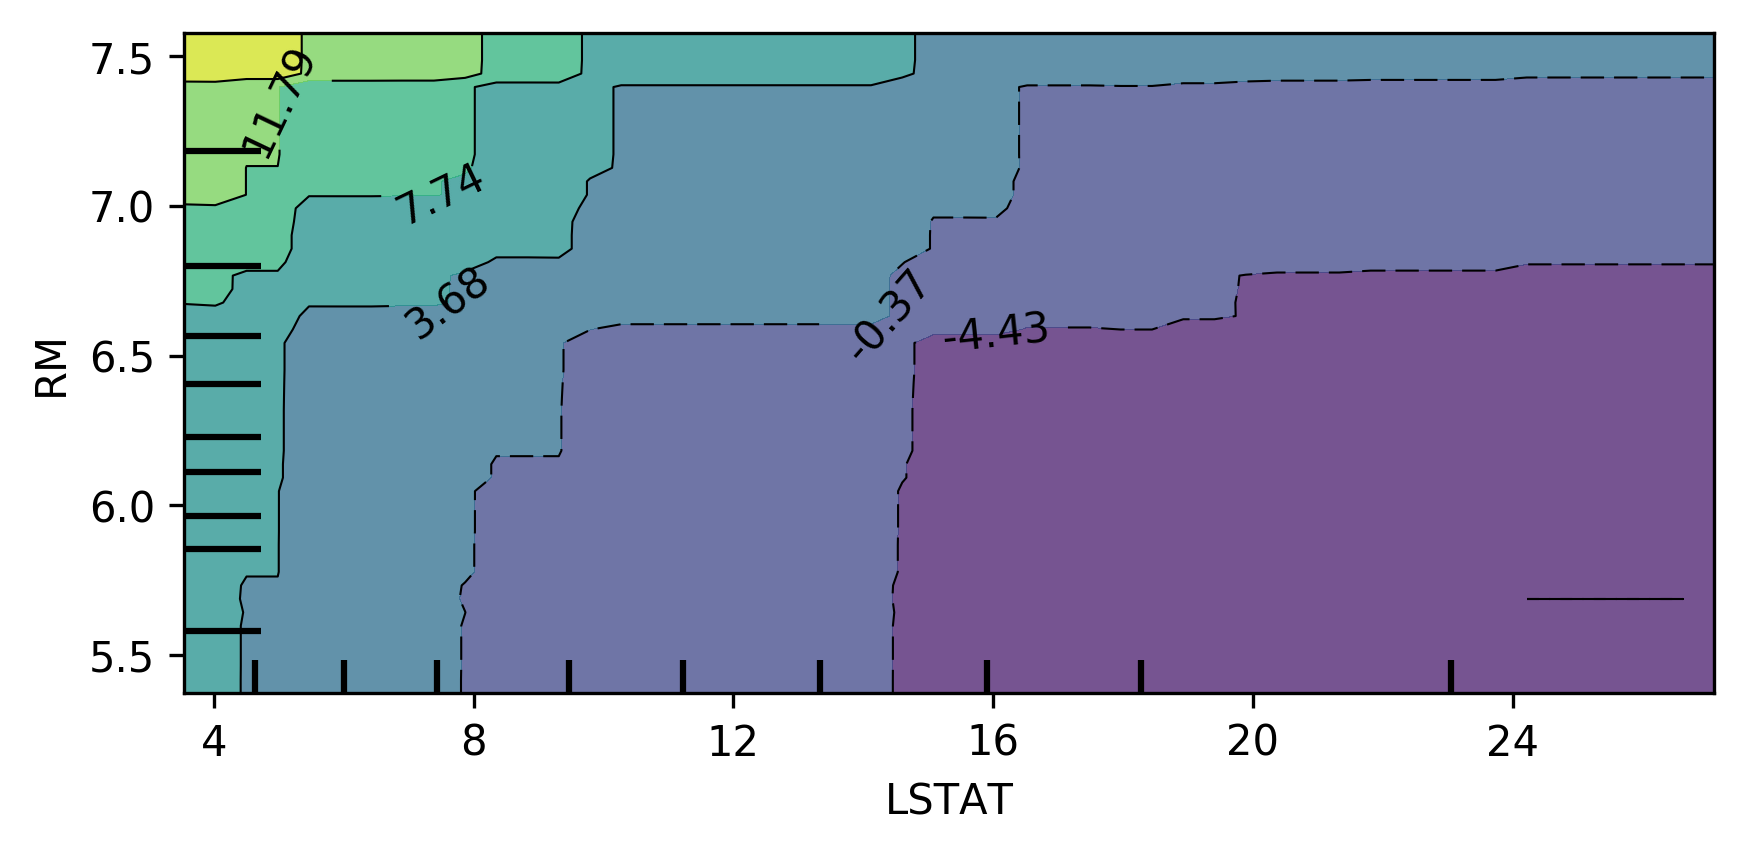

In [56]:
fig, axs = plot_partial_dependence(gbrt, X_train, [np.argsort(gbrt.feature_importances_)[-2:]],
                                   feature_names=boston.feature_names,

                                   n_jobs=3, grid_resolution=50)

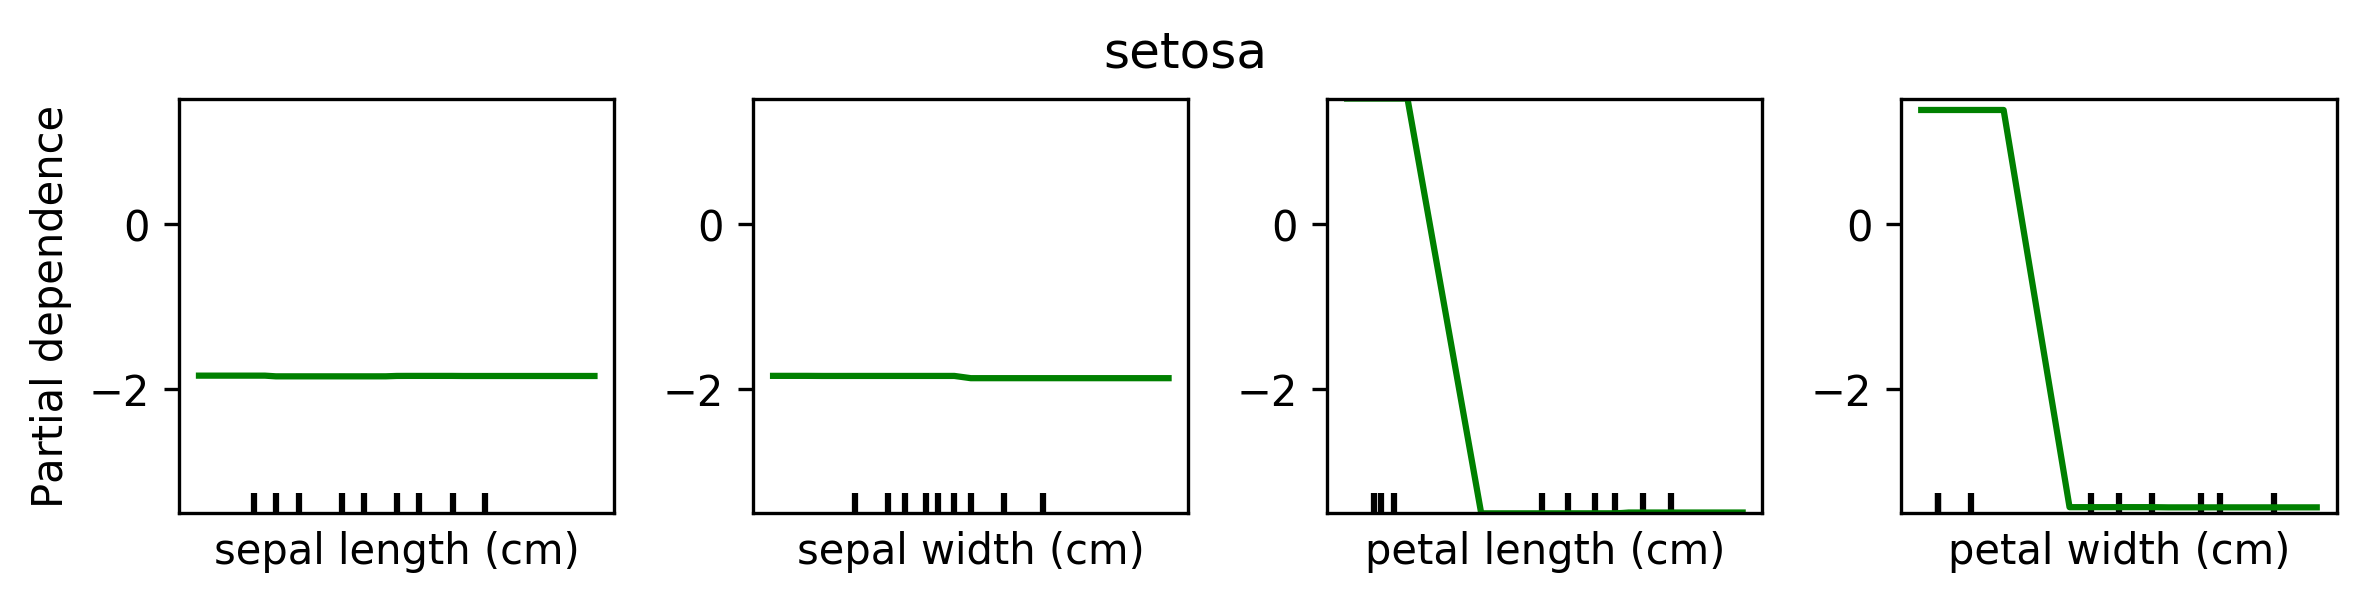

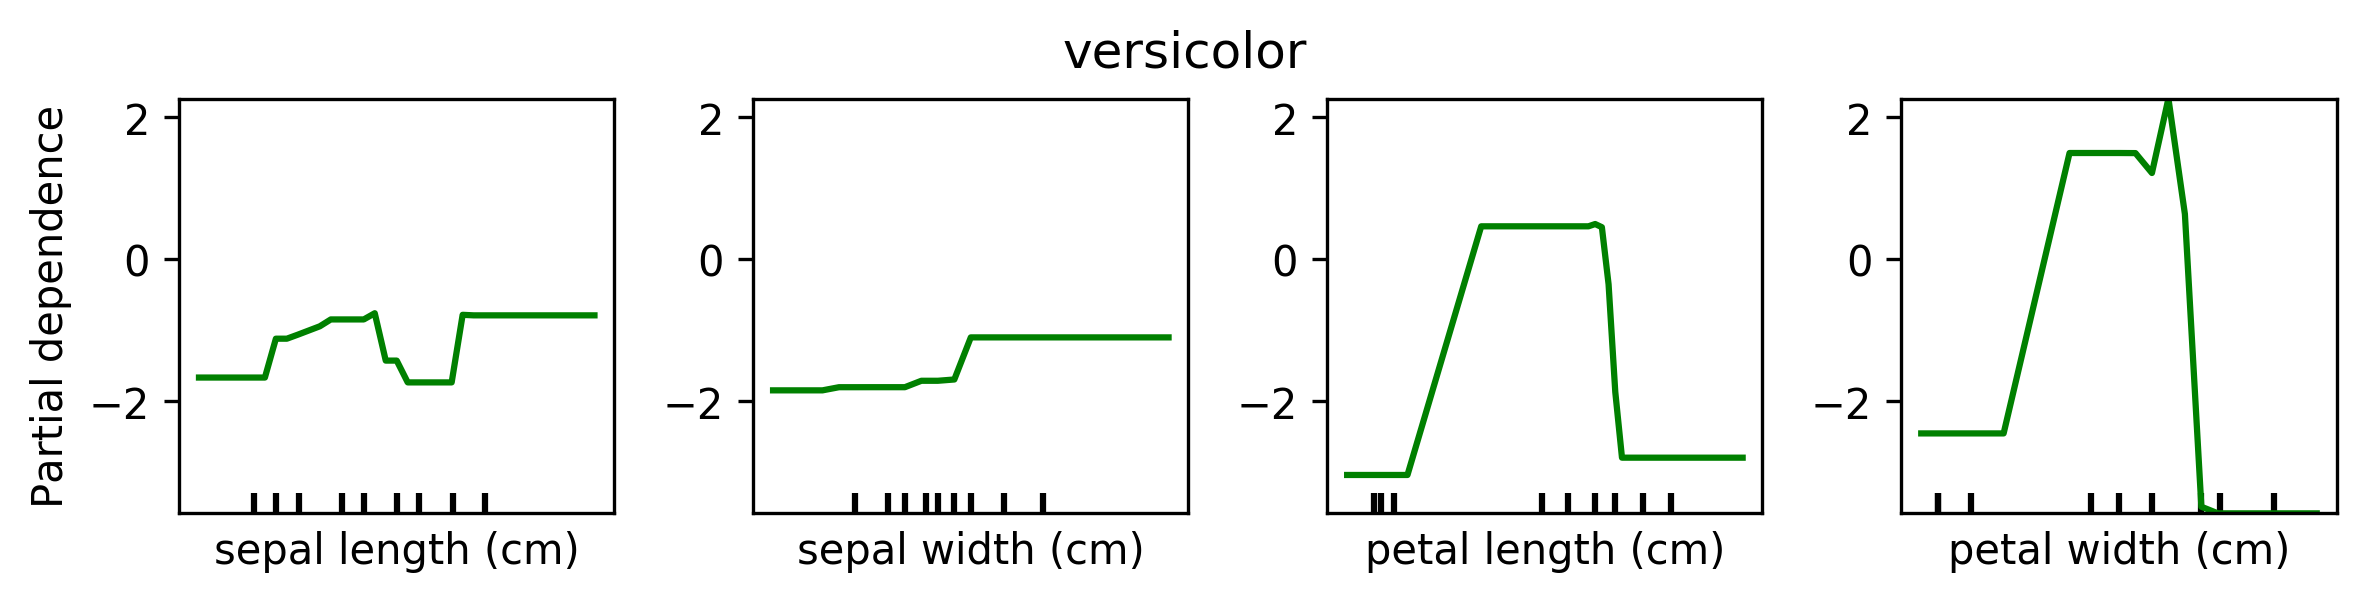

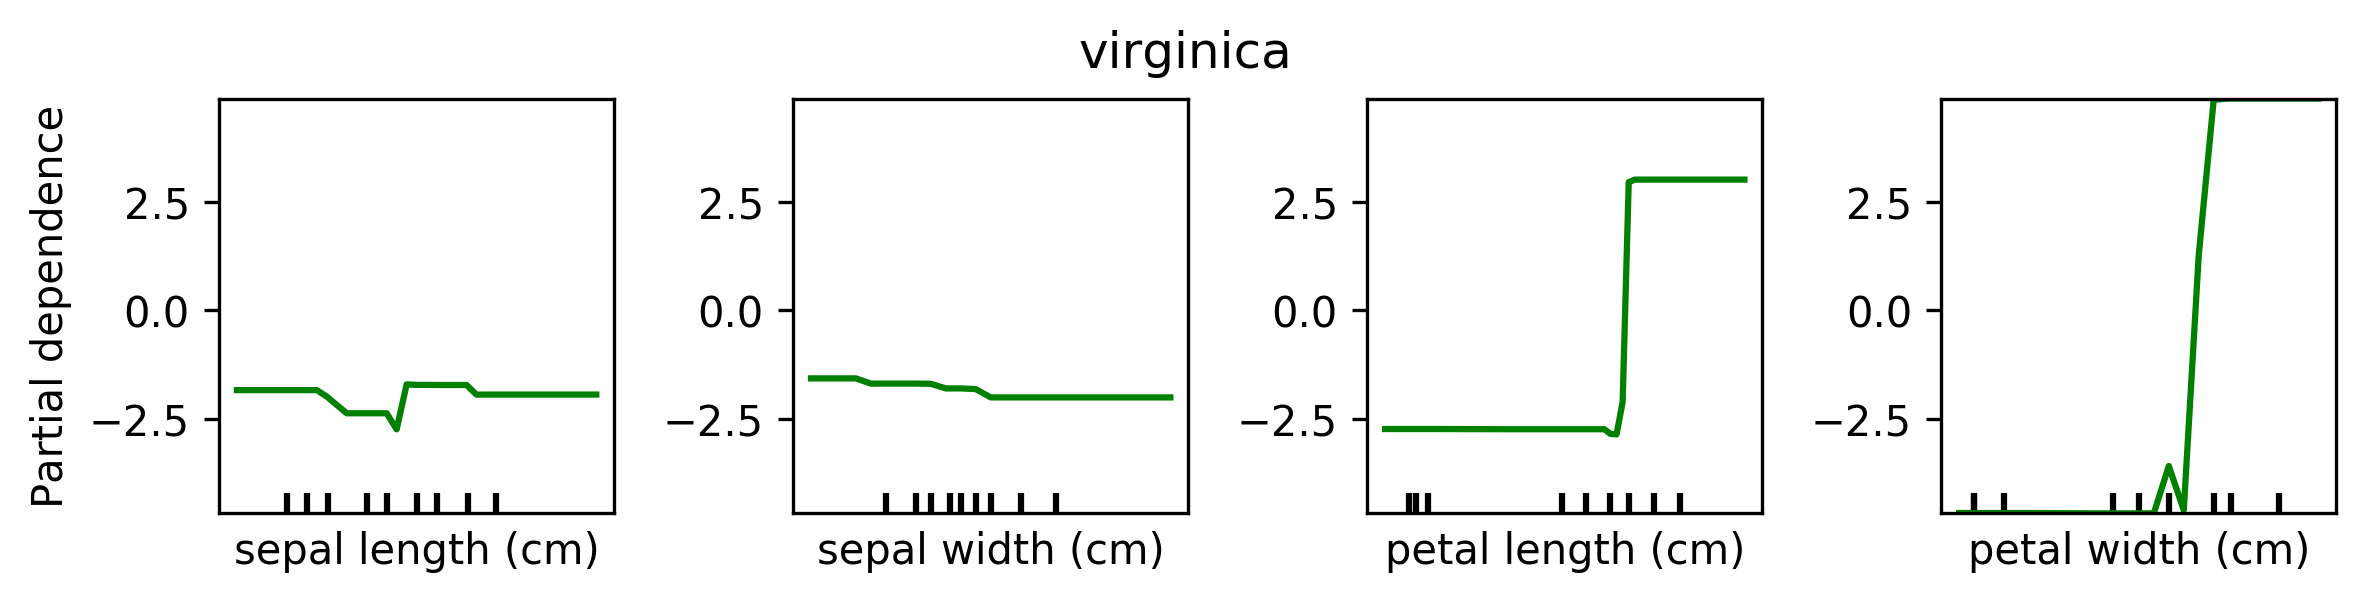

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, stratify=iris.target, random_state=0)
gbrt = GradientBoostingClassifier().fit(X_train, y_train)
gbrt.score(X_test, y_test)

from sklearn.ensemble.partial_dependence import plot_partial_dependence
for i in range(3):
    fig, axs = plot_partial_dependence(gbrt, X_train, range(4), n_cols=4,
                                       feature_names=iris.feature_names, grid_resolution=50, label=i,
                                       figsize=(8, 2))
    fig.suptitle(iris.target_names[i])
    for ax in axs: ax.set_xticks(())
    for ax in axs[1:]: ax.set_ylabel("")

    plt.tight_layout()


# poor man's stacking

In [58]:
from sklearn.neighbors import KNeighborsClassifier

X, y = make_moons(noise=.2, random_state=18)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

voting = VotingClassifier([('logreg', LogisticRegression(C=100)),
                           ('tree', DecisionTreeClassifier(max_depth=3, random_state=0)),
                           ('knn', KNeighborsClassifier(n_neighbors=3))
                          ],
                         voting='soft')
voting.fit(X_train, y_train)
lr, tree, knn = voting.estimators_
print(("{:.2f} " * 4).format(voting.score(X_test, y_test),
                             lr.score(X_test, y_test), tree.score(X_test, y_test),
                             knn.score(X_test, y_test)))

0.88 0.84 0.80 1.00 


In [59]:
x_lin = np.linspace(X_train[:, 0].min() - .5, X_train[:, 0].max() + .5, 100)
y_lin = np.linspace(X_train[:, 1].min() - .5, X_train[:, 1].max() + .5, 100)
x_grid, y_grid = np.meshgrid(x_lin, y_lin)
X_grid = np.c_[x_grid.ravel(), y_grid.ravel()]
# transform produces individual probabilities
lr_probs, tree_probs, knn_probs =  voting.transform(X_grid)

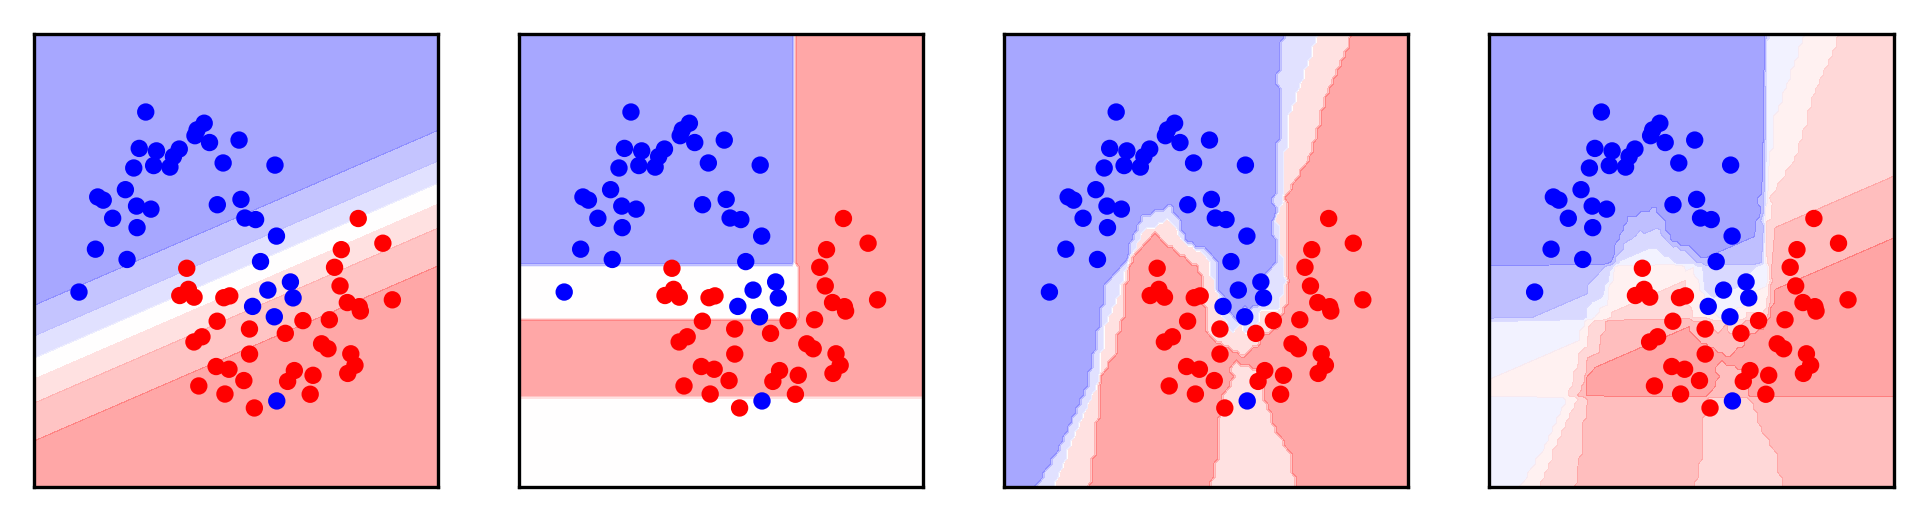

In [60]:
fig, axes = plt.subplots(1, 4, subplot_kw={'xticks': (()), 'yticks': (())}, figsize=(8, 2))
for prob, ax in zip([lr_probs, tree_probs, knn_probs, lr_probs + tree_probs + knn_probs], axes.ravel()):
    ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr', s=10)

In [61]:
from sklearn.preprocessing import FunctionTransformer
# we need to reshape the result from votingclassifier.transform because
# of some annoyance in sklearn. We then keep only the probabilities of the positive classes!
reshaper = FunctionTransformer(lambda X_: np.rollaxis(X_, 1).reshape(-1, 6)[:, 1::2], validate=False)
stacking = make_pipeline(voting, reshaper,
                         LogisticRegression(C=100))
stacking.fit(X_train, y_train)
stacking.score(X_train, y_train)

0.98666666666666669

In [62]:
stacking.score(X_test, y_test)

0.95999999999999996

In [63]:
stacking.named_steps['logisticregression'].coef_

array([[-2.625,  6.261,  9.501]])

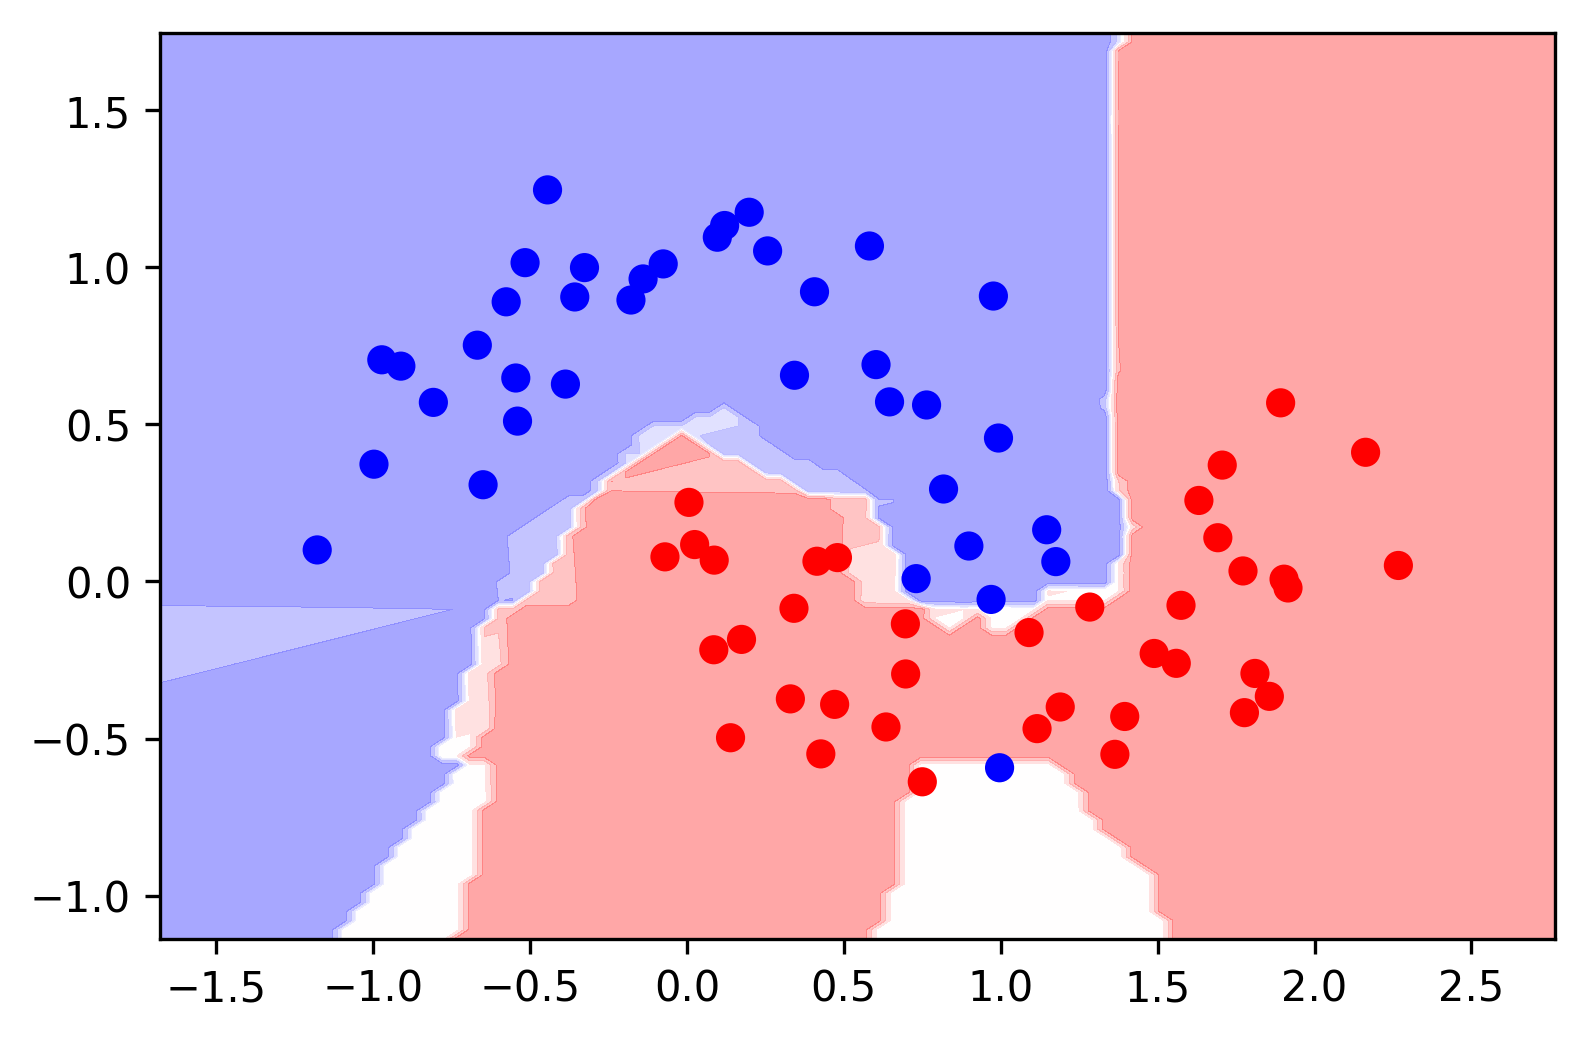

In [65]:
ax = plt.gca()
prob = stacking.predict_proba(X_grid)
ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')

In [68]:
from sklearn.model_selection import cross_val_predict
first_stage = make_pipeline(voting, reshaper)
transform_cv = cross_val_predict(first_stage, X_train, y_train, cv=10, method="transform")

In [70]:
second_stage = LogisticRegression(C=100).fit(transform_cv, y_train)
print(second_stage.coef_)

[[ 2.09  -1.424  7.93 ]]


In [71]:
second_stage.score(transform_cv, y_train)

0.95999999999999996

In [73]:
second_stage.score(first_stage.transform(X_test), y_test)

1.0

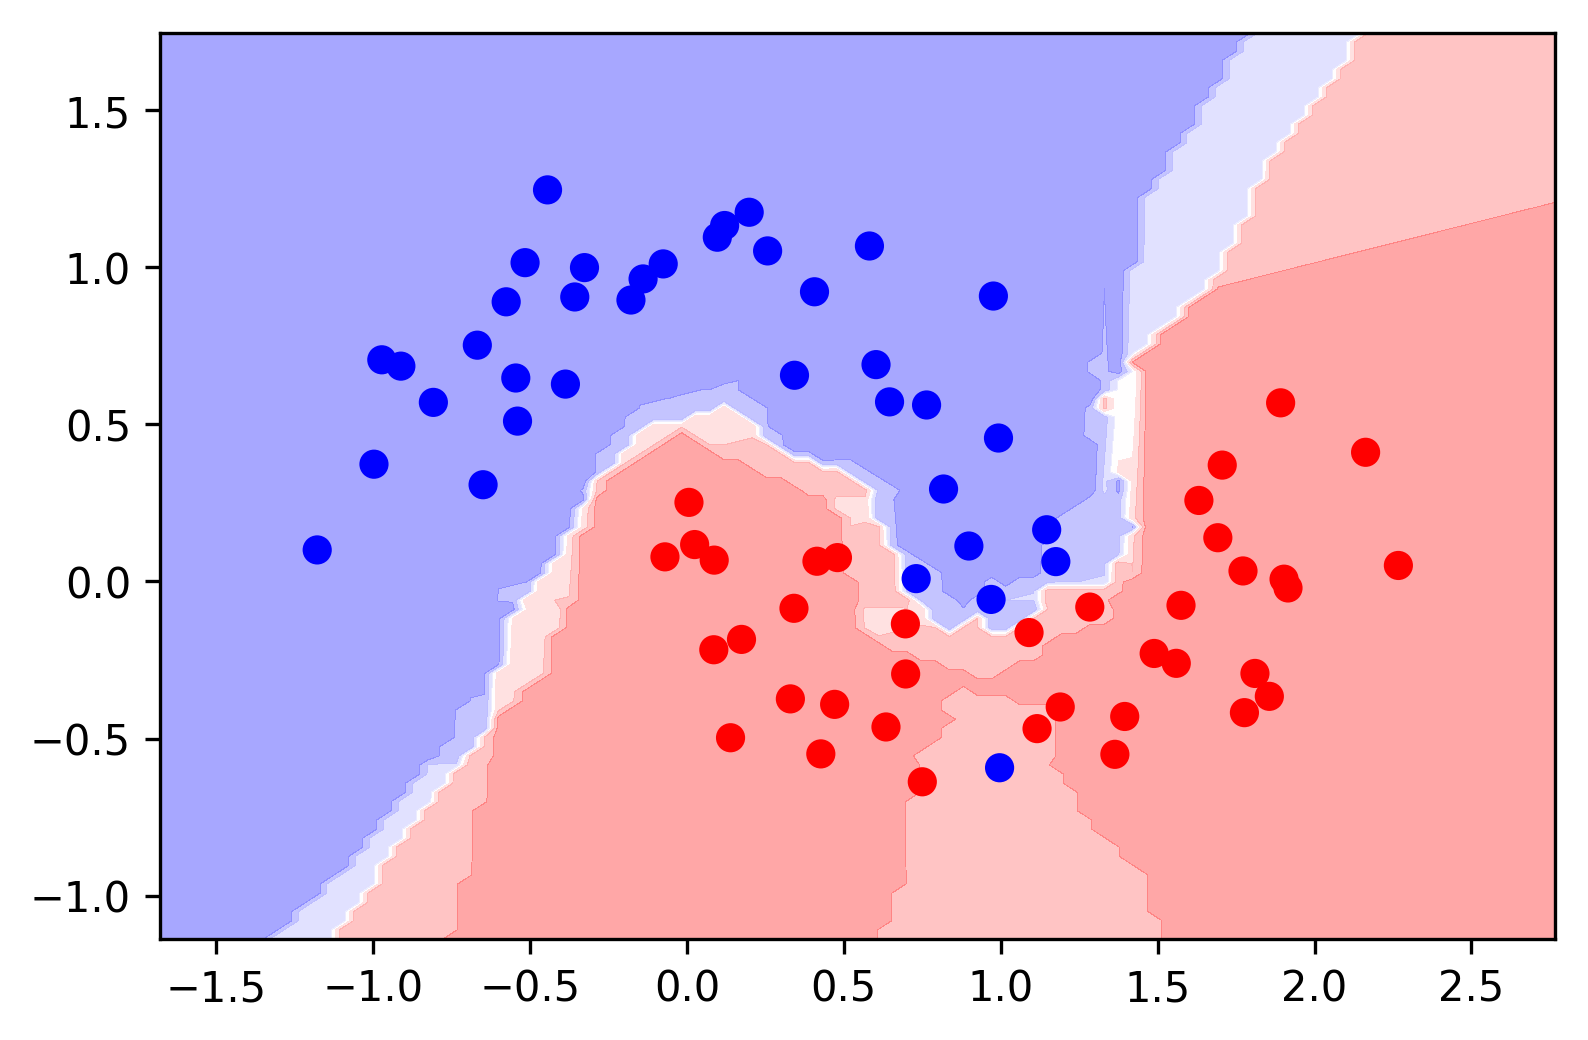

In [74]:
ax = plt.gca()
prob = second_stage.predict_proba(first_stage.transform(X_grid))
ax.contourf(x_grid, y_grid, prob[:, 1].reshape(x_grid.shape), alpha=.4, cmap='bwr')
ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='bwr')